# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

# Note: further wrangling conducted:

Further Wrangling/Data Consistency checks and Column Derivations conducted:


#### Imputing values into the is_superhost column:

Using Excel I determined the following distribution of blank rows (3646 in total) in the is_superhost column: 


I used the super host criteria from Airbnb https://www.airbnb.com/e/superhost  to eliminate many of the blanks by labeling those with a response rate less than 90% or an overall rating of less than 4.8


This reduced the blank count here to 928, less than 2% of the total rows (243483). From here it is safe to leave alone. The data given cannot definitively determine other values, or just be imputed later

#### Imputed total bathrooms columns

I celaned the bathrooms_text column in Excel to convert everything to numbers, then created a total bathrooms column to deal with being able to measure effects of bathrooms. I also imputed 1 for the 47 entries lacking an entry, an educated guess. as property types varied and the number is very small.



#### Derived km_distance_from_center column

I derived a “km_distance_from_center” column as a measurement from the city center:

City center derived from here: https://www.latlong.net/ 

	latitude	longitude
Berlin	52.520008	13.404954

=ACOS(COS(RADIANS(90-L2))*COS(RADIANS(90-52.520008))+SIN(RADIANS(90-L2))*SIN(RADIANS(90-52.520008))*COS(RADIANS(K2-13.404954)))*3959

The Excel formula for making this calculation was derived from here: https://www.exceldemy.com/calculate-distance-between-two-gps-coordinates-excel/ 

However I changed 3959 to 6371 in order to have kilometers, as the 3959 refers to the radius of the Earth in miles. See: https://solarsystem.nasa.gov/planets/earth/in-depth/#:~:text=Distance-,Size%20and%20Distance,the%20fifth%20largest%20planet%20overall.

#### Imputing values into the bedrooms column

Looking at a sample of the data in Excel, more than half of the values in the bedrooms column lacking values are "rooms" in the property_type column, or otherwise indicators of a one-room dwelling. All of the "rooms" can be imputed with "1", while the others can be left alone. This brings it to about 3,700 about 7% of the data which can then be excluded from relevant queries or imputed lkater

####  Imputing values into the beds column

 

The beds column also contains blank values, albeit a small number (3596). Looking at the above visualization, and noting that the mean and average for accommodates and beds is 3 and 2 respectively, beds is best imputed as  2/3 of accommodates rounding up. Done in Excel

#### Dropped further columns

See wrangling at beginning. 

#### Dropped research question

Where and how often is instant booking used? Is it also correlated to price?

#### 8. Changed Research questions

They are found at the end of the document.


### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
from statistics import mode
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import math

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = '/Users/davidey/08-2023_airbnb Berlin'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_wrangledv8.csv'), index_col = False)

### 2. Data Cleaning

In [6]:
#check for mixed column types
for col in df.columns.tolist():
  weird_data = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird_data]) > 0:
    print (col)

host_location
host_is_superhost
host_response_rate
bathrooms_text


In [7]:
#choose new types for certain ones, others will be dropped.
df['host_location'] = df['host_location'].astype('str')

In [8]:
df['host_is_superhost'] = df['host_is_superhost'].astype('str')

In [9]:
df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].astype('str')

In [10]:
df['bathrooms_text'] = df['bathrooms_text'].astype('str')

In [11]:
df.head()

,Unnamed: 0,id,last_scraped,host_location,host_is_superhost,host_response_rate,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,0,3176.0,6/23/23,"Coledale, Australia",f,100%,1.0,Prenzlauer Berg Südwest,Pankow,52.53471,...,4.63,4.67,4.52,4.64,4.69,4.92,4.62,True,f,0.87
1,1,9991.0,6/23/23,"Berlin, Germany",f,NaN,1.0,Prenzlauer Berg Südwest,Pankow,52.53269,...,5.00,5.00,5.00,5.00,5.00,4.86,4.86,True,f,0.08
2,2,14325.0,6/23/23,"Berlin, Germany",f,100%,4.0,Prenzlauer Berg Nordwest,Pankow,52.54813,...,4.67,5.00,4.84,4.68,4.84,4.58,4.42,False,f,0.16
3,3,16644.0,6/23/23,"Santa Cruz, CA",f,100%,4.0,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50312,...,4.72,4.86,4.86,4.93,4.86,4.67,4.71,False,f,0.30
4,4,17904.0,6/23/23,"Rio de Janeiro, Brazil",t,100%,2.0,Reuterstraße,Neukölln,52.49419,...,4.77,4.82,4.71,4.89,4.92,4.87,4.65,False,f,1.84


In [12]:
#get rid of this rogue index column
df = df.drop(columns = ['Unnamed: 0'])

### Look into cleaning

In [13]:
#need to see everything here
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [14]:
df.head()

,id,last_scraped,host_location,host_is_superhost,host_response_rate,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,bathrooms,bathrooms_text,total_bathrooms,bedrooms,beds,price,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,3176.0,6/23/23,"Coledale, Australia",f,100%,1.0,Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,1.861024,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,2.0,$83.00,63,4.63,4.67,4.52,4.64,4.69,4.92,4.62,True,f,0.87
1,9991.0,6/23/23,"Berlin, Germany",f,NaN,1.0,Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,1.665384,Entire rental unit,Entire home/apt,7,NaN,2.5 baths,2.5,4.0,7.0,$180.00,6,5.00,5.00,5.00,5.00,5.00,4.86,4.86,True,f,0.08
2,14325.0,6/23/23,"Berlin, Germany",f,100%,4.0,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,3.128248,Entire rental unit,Entire home/apt,1,NaN,1 bath,1.0,NaN,1.0,$70.00,93,4.67,5.00,4.84,4.68,4.84,4.58,4.42,False,f,0.16
3,16644.0,6/23/23,"Santa Cruz, CA",f,100%,4.0,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50312,13.43508,2.771781,Entire condo,Entire home/apt,5,NaN,1 bath,1.0,1.0,3.0,$92.00,93,4.72,4.86,4.86,4.93,4.86,4.67,4.71,False,f,0.30
4,17904.0,6/23/23,"Rio de Janeiro, Brazil",t,100%,2.0,Reuterstraße,Neukölln,52.49419,13.42166,3.085462,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,1.0,$25.00,92,4.77,4.82,4.71,4.89,4.92,4.87,4.65,False,f,1.84


In [15]:
df.describe()

,id,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,bathrooms,total_bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,5.691800e+04,56862.000000,56918.000000,56918.000000,56918.000000,56918.000000,0.0,56918.000000,53136.000000,55931.000000,56918.000000,46441.000000,45722.000000,45731.000000,45702.000000,45728.000000,45704.000000,45695.000000,46441.000000
mean,1.121884e+17,9.495287,52.509637,13.403738,4.916633,2.852981,NaN,1.123142,1.302488,1.787846,26.999139,4.658430,4.787924,4.653322,4.817201,4.817020,4.755183,4.644969,0.969585
std,2.605380e+17,55.025985,0.034041,0.066916,3.464732,1.776552,NaN,0.380983,0.666209,1.396738,50.096682,0.698426,0.384250,0.483739,0.370883,0.383528,0.360807,0.433140,1.769318
min,3.176000e+03,1.000000,52.332300,13.072850,0.000329,0.000000,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.393104e+07,1.000000,52.489720,13.365870,2.932777,2.000000,NaN,1.000000,1.000000,1.000000,2.000000,4.610000,4.740000,4.500000,4.780000,4.790000,4.670000,4.500000,0.090000
50%,2.927626e+07,1.000000,52.509715,13.413150,4.148767,2.000000,NaN,1.000000,1.000000,1.000000,3.000000,4.840000,4.900000,4.800000,4.930000,4.940000,4.860000,4.750000,0.360000
75%,4.708678e+07,3.000000,52.532550,13.438830,5.832896,4.000000,NaN,1.000000,1.000000,2.000000,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.920000,1.230000
max,9.190000e+17,1126.000000,52.673960,13.769390,27.135185,16.000000,NaN,8.500000,12.000000,29.000000,1124.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,81.390000


The max values are all fine for now

For min values, I would remove 0s from:


price (there are some, but it's a string atm

accomodates

Other operations might take care of these, will do as a last step before moving on.

#### Property type

In [16]:
df['property_type'].value_counts(dropna = False)

Entire rental unit                    27694
Private room in rental unit           16282
Entire condo                           2923
Entire serviced apartment              1747
Entire loft                            1184
Private room in condo                  1053
Room in hotel                           848
Private room in home                    715
Entire home                             597
Shared room in hostel                   336
Room in boutique hotel                  336
Shared room in rental unit              269
Private room in bed and breakfast       238
Entire guesthouse                       228
Private room in loft                    226
Private room in hostel                  213
Entire vacation home                    201
Room in serviced apartment              175
Private room in townhouse               165
Room in aparthotel                      153
Entire townhouse                        125
Entire guest suite                      107
Houseboat                       

In [17]:
df['room_type'].value_counts(dropna = False)

Entire home/apt    35339
Private room       20347
Shared room          689
Hotel room           543
Name: room_type, dtype: int64

Looking at these, it seems the room type is much more important and simple. I will keep the property type just in case, but it looks like it would be needlessly complicated

#### Bathrooms

In [18]:
df['bathrooms_text'].value_counts(dropna = False)

1 bath               33464
1 shared bath        11344
1 private bath        3379
2 baths               3026
1.5 baths             2692
1.5 shared baths      1182
2 shared baths         625
2.5 baths              448
3 baths                168
0 shared baths         117
Half-bath               97
0 baths                 65
2.5 shared baths        55
nan                     47
Shared half-bath        36
3.5 baths               34
4 baths                 32
3 shared baths          28
4.5 baths               12
8.5 shared baths        12
5 shared baths          12
4 shared baths          10
7 baths                  8
Private half-bath        8
5 baths                  6
6 baths                  5
8 baths                  4
7.5 baths                1
5.5 baths                1
Name: bathrooms_text, dtype: int64

In [19]:
df.shape

(56918, 31)

In [20]:
df['total_bathrooms'].value_counts(dropna = False)

1.0    48234
1.5     3874
2.0     3651
2.5      503
3.0      196
0.0      182
0.5      141
4.0       42
3.5       34
5.0       18
4.5       12
8.5       12
7.0        8
6.0        5
8.0        4
7.5        1
5.5        1
Name: total_bathrooms, dtype: int64

Looks as though Excel operaiton was successful, will drop the bathrooms_text column

#### Convert last_scraped column to recognized time

In [21]:
# Convert the column to datetime format
df['last_scraped'] = pd.to_datetime(df['last_scraped'], format='%m/%d/%y')

#### New Columns Needed

In [22]:
# Need something to tell whether host is in locaton or not, a boolean is fine
# First to get the two columns aligned in content
df['city'] = 'Berlin, Germany'

In [23]:
df['city'].value_counts(dropna = False)

Berlin, Germany    56918
Name: city, dtype: int64

In [24]:
df['host_location'].value_counts(dropna = False)

Berlin, Germany                       42096
nan                                    8125
Germany                                 766
Munich, Germany                         297
Hamburg, Germany                        281
Cologne, Germany                        182
London, United Kingdom                  173
Barcelona, Spain                        124
New York, NY                            122
Paris, France                           109
Frankfurt, Germany                       90
Tel Aviv-Yafo, Israel                    81
Potsdam, Germany                         80
England, United Kingdom                  72
Sierksdorf, Germany                      60
Rostock, Germany                         55
Vienna, Austria                          54
Panketal, Germany                        53
Rome, Italy                              53
Milan, Italy                             51
Kleinmachnow, Germany                    51
Madrid, Spain                            50
Zürich, Switzerland             

In [25]:
#create boolean

In [26]:
df['is_host_local'] = df.apply(lambda row: True if row['city'] in row['host_location'] else False, axis=1)

In [27]:
df['is_host_local'].value_counts(dropna = False)

True     42106
False    14812
Name: is_host_local, dtype: int64

In [28]:
df.head(25)

,id,last_scraped,host_location,host_is_superhost,host_response_rate,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,bathrooms,bathrooms_text,total_bathrooms,bedrooms,beds,price,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,city,is_host_local
0,3176.0,2023-06-23,"Coledale, Australia",f,100%,1.0,Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,1.861024,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,2.0,$83.00,63,4.63,4.67,4.52,4.64,4.69,4.92,4.62,True,f,0.87,"Berlin, Germany",False
1,9991.0,2023-06-23,"Berlin, Germany",f,NaN,1.0,Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,1.665384,Entire rental unit,Entire home/apt,7,NaN,2.5 baths,2.5,4.0,7.0,$180.00,6,5.00,5.00,5.00,5.00,5.00,4.86,4.86,True,f,0.08,"Berlin, Germany",True
2,14325.0,2023-06-23,"Berlin, Germany",f,100%,4.0,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,3.128248,Entire rental unit,Entire home/apt,1,NaN,1 bath,1.0,NaN,1.0,$70.00,93,4.67,5.00,4.84,4.68,4.84,4.58,4.42,False,f,0.16,"Berlin, Germany",True
3,16644.0,2023-06-23,"Santa Cruz, CA",f,100%,4.0,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50312,13.43508,2.771781,Entire condo,Entire home/apt,5,NaN,1 bath,1.0,1.0,3.0,$92.00,93,4.72,4.86,4.86,4.93,4.86,4.67,4.71,False,f,0.30,"Berlin, Germany",False
4,17904.0,2023-06-23,"Rio de Janeiro, Brazil",t,100%,2.0,Reuterstraße,Neukölln,52.49419,13.42166,3.085462,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,1.0,$25.00,92,4.77,4.82,4.71,4.89,4.92,4.87,4.65,False,f,1.84,"Berlin, Germany",False
5,20858.0,2023-06-23,"Hamburg, Germany",f,100%,4.0,Prenzlauer Berg Südwest,Pankow,52.53711,13.40888,1.920112,Entire loft,Entire home/apt,4,NaN,1 bath,1.0,2.0,2.0,$179.00,3,4.49,4.61,4.62,4.48,4.49,4.89,4.37,True,f,0.84,"Berlin, Germany",False
6,21869.0,2023-06-23,"Santa Cruz, CA",f,100%,4.0,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50460,13.43374,2.594248,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,2.0,$70.00,93,4.74,4.70,4.91,4.77,4.58,4.62,4.58,False,f,0.39,"Berlin, Germany",False
7,22438.0,2023-06-23,"Berlin, Germany",f,100%,2.0,Brunnenstr. Süd,Mitte,52.53408,13.38871,1.912060,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,2.0,4.0,$53.00,93,4.70,4.76,4.70,4.82,4.73,4.62,4.68,False,f,1.22,"Berlin, Germany",True
8,22677.0,2023-06-23,"Berlin, Germany",t,100%,1.0,Brunnenstr. Süd,Mitte,52.53355,13.40476,1.505859,Entire rental unit,Entire home/apt,6,NaN,1 bath,1.0,2.0,5.0,$170.00,2,4.80,4.82,4.76,4.88,4.89,4.94,4.68,True,f,2.78,"Berlin, Germany",True
9,23834.0,2023-06-23,"Berlin, Germany",f,NaN,1.0,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,52.49134,13.37975,3.615473,Entire condo,Entire home/apt,4,NaN,1 bath,1.0,1.0,3.0,$65.00,185,4.37,4.41,4.51,4.72,4.59,4.52,4.39,False,f,0.62,"Berlin, Germany",True


#### Dropping Columns:

In [29]:
df.shape

(56918, 33)

In [30]:
df.columns

Index(['id', 'last_scraped', 'host_location', 'host_is_superhost',
       'host_response_rate', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'km_distance_from_center', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'total_bathrooms', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable', 'reviews_per_month', 'city', 'is_host_local'],
      dtype='object')

In [31]:
# dropping unneeded columns:
df = df.drop(columns = ['id'])

In [32]:
df = df.drop(columns = ['bathrooms_text'])

In [33]:
df = df.drop(columns = ['host_location'])

In [34]:
df = df.drop(columns = ['minimum_nights'])

In [35]:
df = df.drop(columns = ['instant_bookable'])

In [36]:
df = df.drop(columns = ['reviews_per_month'])

In [37]:
df = df.drop(columns = ['host_response_rate'])

In [38]:
df = df.drop(columns = ['bathrooms'])

In [39]:
df.dtypes

last_scraped                    datetime64[ns]
host_is_superhost                       object
host_listings_count                    float64
neighbourhood_cleansed                  object
neighbourhood_group_cleansed            object
latitude                               float64
longitude                              float64
km_distance_from_center                float64
property_type                           object
room_type                               object
accommodates                             int64
total_bathrooms                        float64
bedrooms                               float64
beds                                   float64
price                                   object
review_scores_rating                   float64
review_scores_accuracy                 float64
review_scores_cleanliness              float64
review_scores_checkin                  float64
review_scores_communication            float64
review_scores_location                 float64
review_scores

In [40]:
df.head()

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,city,is_host_local
0,2023-06-23,f,1.0,Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,1.861024,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,$83.00,4.63,4.67,4.52,4.64,4.69,4.92,4.62,True,"Berlin, Germany",False
1,2023-06-23,f,1.0,Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,1.665384,Entire rental unit,Entire home/apt,7,2.5,4.0,7.0,$180.00,5.00,5.00,5.00,5.00,5.00,4.86,4.86,True,"Berlin, Germany",True
2,2023-06-23,f,4.0,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,3.128248,Entire rental unit,Entire home/apt,1,1.0,NaN,1.0,$70.00,4.67,5.00,4.84,4.68,4.84,4.58,4.42,False,"Berlin, Germany",True
3,2023-06-23,f,4.0,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50312,13.43508,2.771781,Entire condo,Entire home/apt,5,1.0,1.0,3.0,$92.00,4.72,4.86,4.86,4.93,4.86,4.67,4.71,False,"Berlin, Germany",False
4,2023-06-23,t,2.0,Reuterstraße,Neukölln,52.49419,13.42166,3.085462,Entire rental unit,Entire home/apt,2,1.0,NaN,1.0,$25.00,4.77,4.82,4.71,4.89,4.92,4.87,4.65,False,"Berlin, Germany",False


#### Dealing with mixed column types

#### Missing Values Check:

In [41]:
# Check for missing values

df.isnull().sum() 

last_scraped                        0
host_is_superhost                   0
host_listings_count                56
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
km_distance_from_center             0
property_type                       0
room_type                           0
accommodates                        0
total_bathrooms                     0
bedrooms                         3782
beds                              987
price                               0
review_scores_rating            10477
review_scores_accuracy          11196
review_scores_cleanliness       11187
review_scores_checkin           11216
review_scores_communication     11190
review_scores_location          11214
review_scores_value             11223
license                             0
city                                0
is_host_local                       0
dtype: int64

As before, only the review scores have a large amount of missing values. They are too many variables to make an assumption about how to deal with them or the number is too low.

Looking at is_superhost, that one has values written as "nan" in Excel now.

The baths NaN values are expected, since each listing can only list one type

#### Superhost

As detailed, in Excel, I was able to mark some values not as superhosts, as they did not meet some criteria. I think the rest need to be imputed proportionally

In [42]:
# Calculate proportions of 't' and 'f' values for each city
proportions = df.groupby('city')['host_is_superhost'].value_counts(normalize=True).unstack()


# Loop through each row and replace 'nan' values proportionally
for city in df['city'].unique():
    nan_count = df.loc[(df['city'] == city) & (df['host_is_superhost'] == 'nan'), 'host_is_superhost'].count()
    if nan_count > 0:
        nan_proportion = nan_count / df[df['city'] == city].shape[0]
        t_proportion = proportions.loc[city, 't']
        f_proportion = proportions.loc[city, 'f']
        
        # Adjust probabilities to ensure they sum up to 1
        total_proportion = t_proportion + f_proportion
        t_prob = t_proportion / total_proportion
        f_prob = f_proportion / total_proportion
        
        df.loc[(df['city'] == city) & (df['host_is_superhost'] == 'nan'), 'host_is_superhost'] = \
            np.random.choice(['t', 'f'], size=nan_count, p=[t_prob, f_prob])

In [43]:
df['host_is_superhost'].value_counts(dropna=False)

f    48134
t     8784
Name: host_is_superhost, dtype: int64

In [44]:
#change to boolean as appropriate
df['host_is_superhost'] = df['host_is_superhost'].replace({'t': True, 'f': False}).astype(bool)

In [45]:
df['host_is_superhost'].value_counts(dropna=False)

False    48134
True      8784
Name: host_is_superhost, dtype: int64

#### Host Listings Count

In [46]:
# I think this should be imputed on the basis of the mode of the column and the city. It's a small number of missing values and owners likely only have few properties.
city_mode = df.groupby('city')['host_listings_count'].apply(lambda x: mode(x.dropna())).to_dict()

# Function to impute 'host_listings_count' based on city mode
def impute_host_listings_count(row):
    if pd.isnull(row['host_listings_count']):
        return city_mode.get(row['city'], 1)  # Default to 1 if mode is not available. Hosts must have one listing, else how could they be here?
    return row['host_listings_count']
df['host_listings_count'] = df.apply(impute_host_listings_count, axis=1)

In [47]:
df.isnull().sum() 

last_scraped                        0
host_is_superhost                   0
host_listings_count                 0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
km_distance_from_center             0
property_type                       0
room_type                           0
accommodates                        0
total_bathrooms                     0
bedrooms                         3782
beds                              987
price                               0
review_scores_rating            10477
review_scores_accuracy          11196
review_scores_cleanliness       11187
review_scores_checkin           11216
review_scores_communication     11190
review_scores_location          11214
review_scores_value             11223
license                             0
city                                0
is_host_local                       0
dtype: int64

#### Bedrooms

In [48]:
df.describe()

,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,56918.000000,56918.000000,56918.000000,56918.000000,56918.000000,56918.000000,53136.000000,55931.000000,46441.000000,45722.000000,45731.000000,45702.000000,45728.000000,45704.000000,45695.000000
mean,9.486929,52.509637,13.403738,4.916633,2.852981,1.123142,1.302488,1.787846,4.658430,4.787924,4.653322,4.817201,4.817020,4.755183,4.644969
std,54.999554,0.034041,0.066916,3.464732,1.776552,0.380983,0.666209,1.396738,0.698426,0.384250,0.483739,0.370883,0.383528,0.360807,0.433140
min,1.000000,52.332300,13.072850,0.000329,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,52.489720,13.365870,2.932777,2.000000,1.000000,1.000000,1.000000,4.610000,4.740000,4.500000,4.780000,4.790000,4.670000,4.500000
50%,1.000000,52.509715,13.413150,4.148767,2.000000,1.000000,1.000000,1.000000,4.840000,4.900000,4.800000,4.930000,4.940000,4.860000,4.750000
75%,3.000000,52.532550,13.438830,5.832896,4.000000,1.000000,1.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.920000
max,1126.000000,52.673960,13.769390,27.135185,16.000000,8.500000,12.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [49]:
df['bedrooms'].value_counts(dropna=False)

1.0     41427
2.0      8492
NaN      3782
3.0      2433
4.0       567
5.0       145
6.0        39
7.0        17
8.0         5
9.0         5
12.0        4
10.0        2
Name: bedrooms, dtype: int64

In [50]:
median_bedrooms = df['bedrooms'].median()
try:
    mode_bedrooms = mode(df['bedrooms'])
except StatisticsError:
    mode_bedrooms = None

print("Median Bedrooms:", median_bedrooms)
print("Mode Bedrooms:", mode_bedrooms)

Median Bedrooms: 1.0
Mode Bedrooms: 1.0


In [51]:
# As average, mean and mode of bedrooms is all similar, I am going to impute 
# average, mode or median, based on whichever is lowest based on city and property type.
# This is because I think the room count is likely to be lower as a rental property for tourists

# Custom function to calculate mode
def custom_mode(data):
    try:
        return mode(data)
    except StatisticsError:
        return None

# Calculate median, mode, and average bedrooms per property_type and city
property_city_stats = df.groupby(['property_type', 'city'])['bedrooms'].agg(['median', 'mean', custom_mode])

# Function to impute bedrooms based on property_type and city
def impute_bedrooms(row):
    if pd.isnull(row['bedrooms']):
        property_stats = property_city_stats.loc[(row['property_type'], row['city'])]
        imputed_value = min(property_stats['median'], property_stats['mean'], property_stats['custom_mode'])
        if pd.notnull(imputed_value):  # Check if imputed_value is not NaN
            return round(imputed_value)  # Round to the nearest integer
    return row['bedrooms']

# Apply the imputation function to empty cells in the 'bedrooms' column
df['bedrooms'] = df.apply(impute_bedrooms, axis=1)

In [52]:
df.isnull().sum() 

last_scraped                        0
host_is_superhost                   0
host_listings_count                 0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
km_distance_from_center             0
property_type                       0
room_type                           0
accommodates                        0
total_bathrooms                     0
bedrooms                            8
beds                              987
price                               0
review_scores_rating            10477
review_scores_accuracy          11196
review_scores_cleanliness       11187
review_scores_checkin           11216
review_scores_communication     11190
review_scores_location          11214
review_scores_value             11223
license                             0
city                                0
is_host_local                       0
dtype: int64

In [53]:
# delete remaining NaN bedrooms rows
df = df.dropna(subset=['bedrooms'])

In [54]:
df.isnull().sum() 

last_scraped                        0
host_is_superhost                   0
host_listings_count                 0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
km_distance_from_center             0
property_type                       0
room_type                           0
accommodates                        0
total_bathrooms                     0
bedrooms                            0
beds                              987
price                               0
review_scores_rating            10476
review_scores_accuracy          11195
review_scores_cleanliness       11186
review_scores_checkin           11215
review_scores_communication     11189
review_scores_location          11213
review_scores_value             11222
license                             0
city                                0
is_host_local                       0
dtype: int64

In [55]:
df['bedrooms'].value_counts(dropna=False)

1.0     45175
2.0      8517
3.0      2434
4.0       567
5.0       145
6.0        39
7.0        17
8.0         5
9.0         5
12.0        4
10.0        2
Name: bedrooms, dtype: int64

#### Beds

For the missing beds, I am going to imputer a value of 2/3 of the value of the accommodates column in the same row rounding up to the nearest integer. This is an educated guess; the average amount of beds is 1.78, and the average accommodates value is 2.86

In [56]:
# Function to impute beds based on accommodates column
def impute_beds(row):
    if pd.isnull(row['beds']):
        return math.ceil(row['accommodates'] * 2/3)
    return row['beds']

# Apply the impute_beds function to the dataframe
df['beds'] = df.apply(impute_beds, axis=1)


In [57]:
df.isnull().sum() 

last_scraped                        0
host_is_superhost                   0
host_listings_count                 0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
km_distance_from_center             0
property_type                       0
room_type                           0
accommodates                        0
total_bathrooms                     0
bedrooms                            0
beds                                0
price                               0
review_scores_rating            10476
review_scores_accuracy          11195
review_scores_cleanliness       11186
review_scores_checkin           11215
review_scores_communication     11189
review_scores_location          11213
review_scores_value             11222
license                             0
city                                0
is_host_local                       0
dtype: int64

In [58]:
df['beds'].value_counts(dropna=False)

1.0     32981
2.0     14284
3.0      4606
4.0      2493
5.0      1003
6.0       786
7.0       253
8.0       210
9.0        77
10.0       76
11.0       44
12.0       26
16.0       20
14.0       15
17.0        8
0.0         8
15.0        6
22.0        4
19.0        3
13.0        3
29.0        2
24.0        1
26.0        1
Name: beds, dtype: int64

#### Review scores columns

In [59]:
#Truly I think there isn't a good way to do this. There is no basis to determine reviews, but
#the amount of missing values is huge. I think though that because the scores in general are so high
# and the standard deviation is small that the average rating



In [60]:
city_average_scores = df.groupby('city')['review_scores_rating'].mean()

# Function to impute missing review_scores_rating based on average
def impute_review_scores(row):
    if pd.isnull(row['review_scores_rating']):
        return city_average_scores.get(row['city'], None)  # Default to None if average is not available
    return row['review_scores_rating']

# Apply the imputation function to empty cells in the column
df['review_scores_rating'] = df.apply(impute_review_scores, axis=1)


In [61]:
city_accuracy_scores = df.groupby('city')['review_scores_accuracy'].mean()


def impute_accuracy_scores(row):
    if pd.isnull(row['review_scores_accuracy']):
        return city_accuracy_scores.get(row['city'], None) 
    return row['review_scores_accuracy']


df['review_scores_accuracy'] = df.apply(impute_accuracy_scores, axis=1)


In [62]:
city_cleanliness_scores = df.groupby('city')['review_scores_cleanliness'].mean()


def impute_cleanliness_scores(row):
    if pd.isnull(row['review_scores_cleanliness']):
        return city_cleanliness_scores.get(row['city'], None)  
    return row['review_scores_cleanliness']


df['review_scores_cleanliness'] = df.apply(impute_cleanliness_scores, axis=1)


In [63]:
city_checkin_scores = df.groupby('city')['review_scores_checkin'].mean()


def impute_checkin_scores(row):
    if pd.isnull(row['review_scores_checkin']):
        return city_checkin_scores.get(row['city'], None)  
    return row['review_scores_checkin']


df['review_scores_checkin'] = df.apply(impute_checkin_scores, axis=1)


In [64]:
city_communication_scores = df.groupby('city')['review_scores_communication'].mean()


def impute_communication_scores(row):
    if pd.isnull(row['review_scores_communication']):
        return city_communication_scores.get(row['city'], None)  
    return row['review_scores_communication']

df['review_scores_communication'] = df.apply(impute_communication_scores, axis=1)


In [65]:
city_location_scores = df.groupby('city')['review_scores_location'].mean()

def impute_location_scores(row):
    if pd.isnull(row['review_scores_location']):
        return city_location_scores.get(row['city'], None) 
    return row['review_scores_location']


df['review_scores_location'] = df.apply(impute_location_scores, axis=1)


In [66]:
city_value_scores = df.groupby('city')['review_scores_value'].mean()


def impute_value_scores(row):
    if pd.isnull(row['review_scores_value']):
        return city_value_scores.get(row['city'], None) 
    return row['review_scores_value']


df['review_scores_value'] = df.apply(impute_value_scores, axis=1)


In [67]:
df.isnull().sum() 

last_scraped                    0
host_is_superhost               0
host_listings_count             0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
km_distance_from_center         0
property_type                   0
room_type                       0
accommodates                    0
total_bathrooms                 0
bedrooms                        0
beds                            0
price                           0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
license                         0
city                            0
is_host_local                   0
dtype: int64

In [68]:
#Yay, no more unexpected null values!

#### Fix price column

Otherwise it is an unreadable string and cannot correlate, also it is likely dragged up by outliers

In [69]:
# Clean up price so it will display properly
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_89163/3088032186.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [70]:
df.describe()

,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000,56910.000000
mean,9.481093,52.509641,13.403752,4.915940,2.853101,1.123159,1.282903,1.789106,105.053674,4.658437,4.787921,4.653330,4.817192,4.817044,4.755165,4.645043
std,54.987022,0.034038,0.066902,3.463929,1.776648,0.381007,0.648311,1.387703,637.674277,0.630918,0.344413,0.433629,0.332359,0.343772,0.323335,0.388048
min,1.000000,52.332300,13.072850,0.000329,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,52.489720,13.365953,2.932507,2.000000,1.000000,1.000000,1.000000,45.000000,4.658437,4.787921,4.620000,4.817192,4.817044,4.730000,4.600000
50%,1.000000,52.509720,13.413150,4.148767,2.000000,1.000000,1.000000,1.000000,70.000000,4.750000,4.830000,4.690000,4.870000,4.880000,4.780000,4.670000
75%,3.000000,52.532550,13.438830,5.832634,4.000000,1.000000,1.000000,2.000000,119.000000,4.980000,5.000000,4.940000,5.000000,5.000000,4.990000,4.860000
max,1126.000000,52.673960,13.769390,27.135185,16.000000,8.500000,12.000000,29.000000,98108.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [71]:
median_price = df['price'].median()

In [72]:
print(median_price)

70.0


In [73]:
#If need to discard outliers, will use the Mean + 2xSD method, so soem very high prices will remain while taking away extreme values

#### Duplicates Check:

In [74]:
# Find duplicates

df_dups = df[df.duplicated()]

In [75]:
df_dups.shape 

(41, 25)

In [76]:
#duplicates found. Dropping
df = df.drop_duplicates()

In [77]:
df_dups = df[df.duplicated()]

In [78]:
#no more duplicates
df_dups

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,city,is_host_local


#### Deal with impossible zeroes

In [79]:
df.describe()

,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000,56869.000000
mean,9.420844,52.509626,13.403777,4.915478,2.853382,1.123160,1.283036,1.789499,105.004424,4.658425,4.787913,4.653318,4.817186,4.817037,4.755156,4.645031
std,54.818877,0.034029,0.066907,3.464382,1.777038,0.380997,0.648477,1.388066,637.859081,0.631142,0.344535,0.433781,0.332477,0.343894,0.323448,0.388182
min,1.000000,52.332300,13.072850,0.000329,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,52.489720,13.366020,2.932360,2.000000,1.000000,1.000000,1.000000,45.000000,4.658437,4.787921,4.620000,4.817192,4.817044,4.730000,4.600000
50%,1.000000,52.509710,13.413180,4.148767,2.000000,1.000000,1.000000,1.000000,70.000000,4.750000,4.830000,4.690000,4.870000,4.880000,4.780000,4.670000
75%,3.000000,52.532540,13.438830,5.831872,4.000000,1.000000,1.000000,2.000000,119.000000,4.980000,5.000000,4.940000,5.000000,5.000000,4.990000,4.860000
max,1126.000000,52.673960,13.769390,27.135185,16.000000,8.500000,12.000000,29.000000,98108.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


price and accomodates still have unreasonable zeroes

In [80]:
df_zero_price = df[df['price'] == 0]

In [81]:
df_zero_price.shape

(12, 25)

In [82]:
df_zero_price.head(50)

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,city,is_host_local
7597,2023-06-23,False,5.0,Tiergarten Süd,Mitte,52.501200,13.362870,3.533416,Room in hotel,Hotel room,4,1.0,1.0,3.0,0.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,"Berlin, Germany",False
7753,2023-06-23,False,2.0,Otto-Suhr-Allee,Charlottenburg-Wilm.,52.506580,13.329350,5.329604,Room in hostel,Hotel room,0,1.0,1.0,0.0,0.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,"Berlin, Germany",True
23728,2022-12-21,False,5.0,Tiergarten Süd,Mitte,52.501200,13.362870,3.533416,Room in hotel,Hotel room,4,1.0,1.0,3.0,0.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,"Berlin, Germany",False
23938,2022-12-22,False,2.0,Otto-Suhr-Allee,Charlottenburg-Wilm.,52.506580,13.329350,5.329604,Room in hostel,Hotel room,0,1.0,1.0,0.0,0.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,"Berlin, Germany",True
24455,2022-12-21,False,7.0,Düsseldorfer Straße,Charlottenburg-Wilm.,52.496910,13.323850,6.060145,Room in boutique hotel,Hotel room,0,1.0,1.0,0.0,0.0,4.730000,4.360000,4.82000,4.730000,4.730000,4.640000,4.360000,False,"Berlin, Germany",True
24724,2022-12-21,False,4.0,Kantstraße,Charlottenburg-Wilm.,52.506773,13.321417,5.841442,Room in boutique hotel,Hotel room,0,1.0,1.0,0.0,0.0,4.000000,5.000000,5.00000,5.000000,5.000000,5.000000,4.000000,False,"Berlin, Germany",True
35869,2023-03-19,False,5.0,Tiergarten Süd,Mitte,52.501200,13.362870,3.533416,Room in hotel,Hotel room,4,1.0,1.0,3.0,0.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,"Berlin, Germany",False
35926,2023-03-20,False,2.0,Otto-Suhr-Allee,Charlottenburg-Wilm.,52.506580,13.329350,5.329604,Room in hostel,Hotel room,0,1.0,1.0,0.0,0.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,"Berlin, Germany",True
52561,2022-09-15,False,5.0,Tiergarten Süd,Mitte,52.501200,13.362870,3.533416,Room in hotel,Hotel room,4,1.0,1.0,3.0,0.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,"Berlin, Germany",False
52769,2022-09-16,False,2.0,Otto-Suhr-Allee,Charlottenburg-Wilm.,52.506580,13.329350,5.329604,Room in hostel,Hotel room,0,1.0,1.0,0.0,0.0,4.658437,4.787921,4.65333,4.817192,4.817044,4.755165,4.645043,False,"Berlin, Germany",True


This is a small number but I don't want to impute. I will delete these rows.

In [83]:
df.shape

(56869, 25)

In [84]:
df = df[df['price'] != 0]

In [85]:
df.shape

(56857, 25)

In [86]:
df_zero_accommodates = df[df['accommodates'] == 0]

In [87]:
df_zero_accommodates.shape

(0, 25)

In [88]:
df.describe()

,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000
mean,9.421953,52.509628,13.403791,4.915473,2.853703,1.123186,1.283096,1.789665,105.026586,4.658447,4.787913,4.653303,4.817181,4.817032,4.755150,4.645059
std,54.824603,0.034032,0.066907,3.464715,1.776878,0.381033,0.648532,1.388013,637.924567,0.631196,0.344564,0.433821,0.332510,0.343928,0.323478,0.388202
min,1.000000,52.332300,13.072850,0.000329,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,52.489710,13.366050,2.932125,2.000000,1.000000,1.000000,1.000000,45.000000,4.658437,4.787921,4.620000,4.817192,4.817044,4.730000,4.600000
50%,1.000000,52.509720,13.413190,4.148767,2.000000,1.000000,1.000000,1.000000,70.000000,4.750000,4.830000,4.690000,4.870000,4.880000,4.780000,4.670000
75%,3.000000,52.532550,13.438840,5.831872,4.000000,1.000000,1.000000,2.000000,119.000000,4.980000,5.000000,4.940000,5.000000,5.000000,4.990000,4.860000
max,1126.000000,52.673960,13.769390,27.135185,16.000000,8.500000,12.000000,29.000000,98108.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


A previous operation took care of this. All done!

### 3. Exploring Relationships

### Correlations:

In [89]:
# Create a correlation matrix using pandas

df.corr()

/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_89163/1125721538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,host_is_superhost,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local
host_is_superhost,1.000000,-0.026491,0.027641,-0.020486,0.014862,0.092025,0.045100,0.055743,0.062686,0.021375,0.131007,0.122742,0.170518,0.107878,0.109970,0.076109,0.098821,0.315838,0.064567
host_listings_count,-0.026491,1.000000,-0.014100,0.004864,0.016739,0.039294,0.004784,0.004052,0.042199,0.011477,-0.025487,-0.055502,-0.027772,-0.076972,-0.064139,-0.036422,-0.074173,0.089641,-0.129016
latitude,0.027641,-0.014100,1.000000,-0.133338,-0.407050,0.006806,-0.004633,0.009448,-0.005657,0.007437,0.004955,0.011404,0.015521,-0.012153,0.001636,0.009773,0.009713,0.006282,0.009016
longitude,-0.020486,0.004864,-0.133338,1.000000,-0.066371,0.003863,-0.024413,-0.005501,-0.005091,-0.004490,0.007240,0.013697,-0.002754,0.013737,0.015836,-0.003013,0.022537,0.000151,0.027528
km_distance_from_center,0.014862,0.016739,-0.407050,-0.066371,1.000000,0.016464,0.019575,0.046724,0.067768,-0.008010,-0.004638,-0.019444,0.001025,0.009553,-0.014654,-0.171415,-0.016087,0.010766,-0.075633
accommodates,0.092025,0.039294,0.006806,0.003863,0.016464,1.000000,0.371540,0.713076,0.794530,0.073525,0.010128,-0.032900,0.000610,-0.012507,-0.017640,-0.045903,-0.056219,0.272187,0.017262
total_bathrooms,0.045100,0.004784,-0.004633,-0.024413,0.019575,0.371540,1.000000,0.431479,0.348494,0.052123,0.029877,0.015459,0.017298,0.005261,0.017001,0.004711,0.014609,0.103861,0.019552
bedrooms,0.055743,0.004052,0.009448,-0.005501,0.046724,0.713076,0.431479,1.000000,0.650341,0.067457,0.026182,0.000927,0.031224,0.011826,0.015984,-0.011098,-0.004002,0.162865,0.028166
beds,0.062686,0.042199,-0.005657,-0.005091,0.067768,0.794530,0.348494,0.650341,1.000000,0.059909,-0.002453,-0.051477,-0.020028,-0.025234,-0.034771,-0.061909,-0.065368,0.234215,-0.003230
price,0.021375,0.011477,0.007437,-0.004490,-0.008010,0.073525,0.052123,0.067457,0.059909,1.000000,0.003681,-0.004963,0.003208,-0.007143,-0.007398,-0.004807,-0.018796,0.057479,-0.000846


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56857 entries, 0 to 56917
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   last_scraped                  56857 non-null  datetime64[ns]
 1   host_is_superhost             56857 non-null  bool          
 2   host_listings_count           56857 non-null  float64       
 3   neighbourhood_cleansed        56857 non-null  object        
 4   neighbourhood_group_cleansed  56857 non-null  object        
 5   latitude                      56857 non-null  float64       
 6   longitude                     56857 non-null  float64       
 7   km_distance_from_center       56857 non-null  float64       
 8   property_type                 56857 non-null  object        
 9   room_type                     56857 non-null  object        
 10  accommodates                  56857 non-null  int64         
 11  total_bathrooms             

In [91]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'km_distance_from_center', 'property_type', 'room_type',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'city', 'is_host_local'],
      dtype='object')

In [92]:
df_mpl_columns = ['host_is_superhost', 'host_listings_count',
       'km_distance_from_center', 'accommodates', 'total_bathrooms',
       'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'is_host_local']

In [93]:
df_mpl_subset = df[df_mpl_columns]

In [94]:
correlation_matrix = df_mpl_subset.corr()

Text(0.5, 1.0, 'Correlation Matrix')

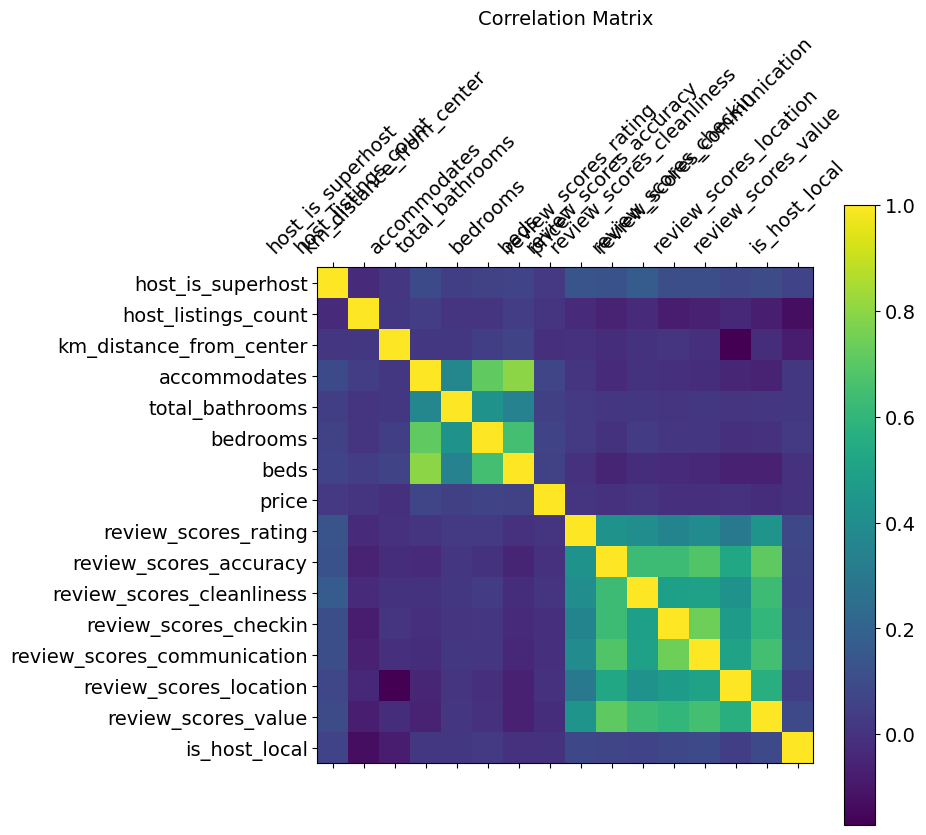

In [95]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_mpl_subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_mpl_subset.shape[1]), df_mpl_subset.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_mpl_subset.shape[1]), df_mpl_subset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

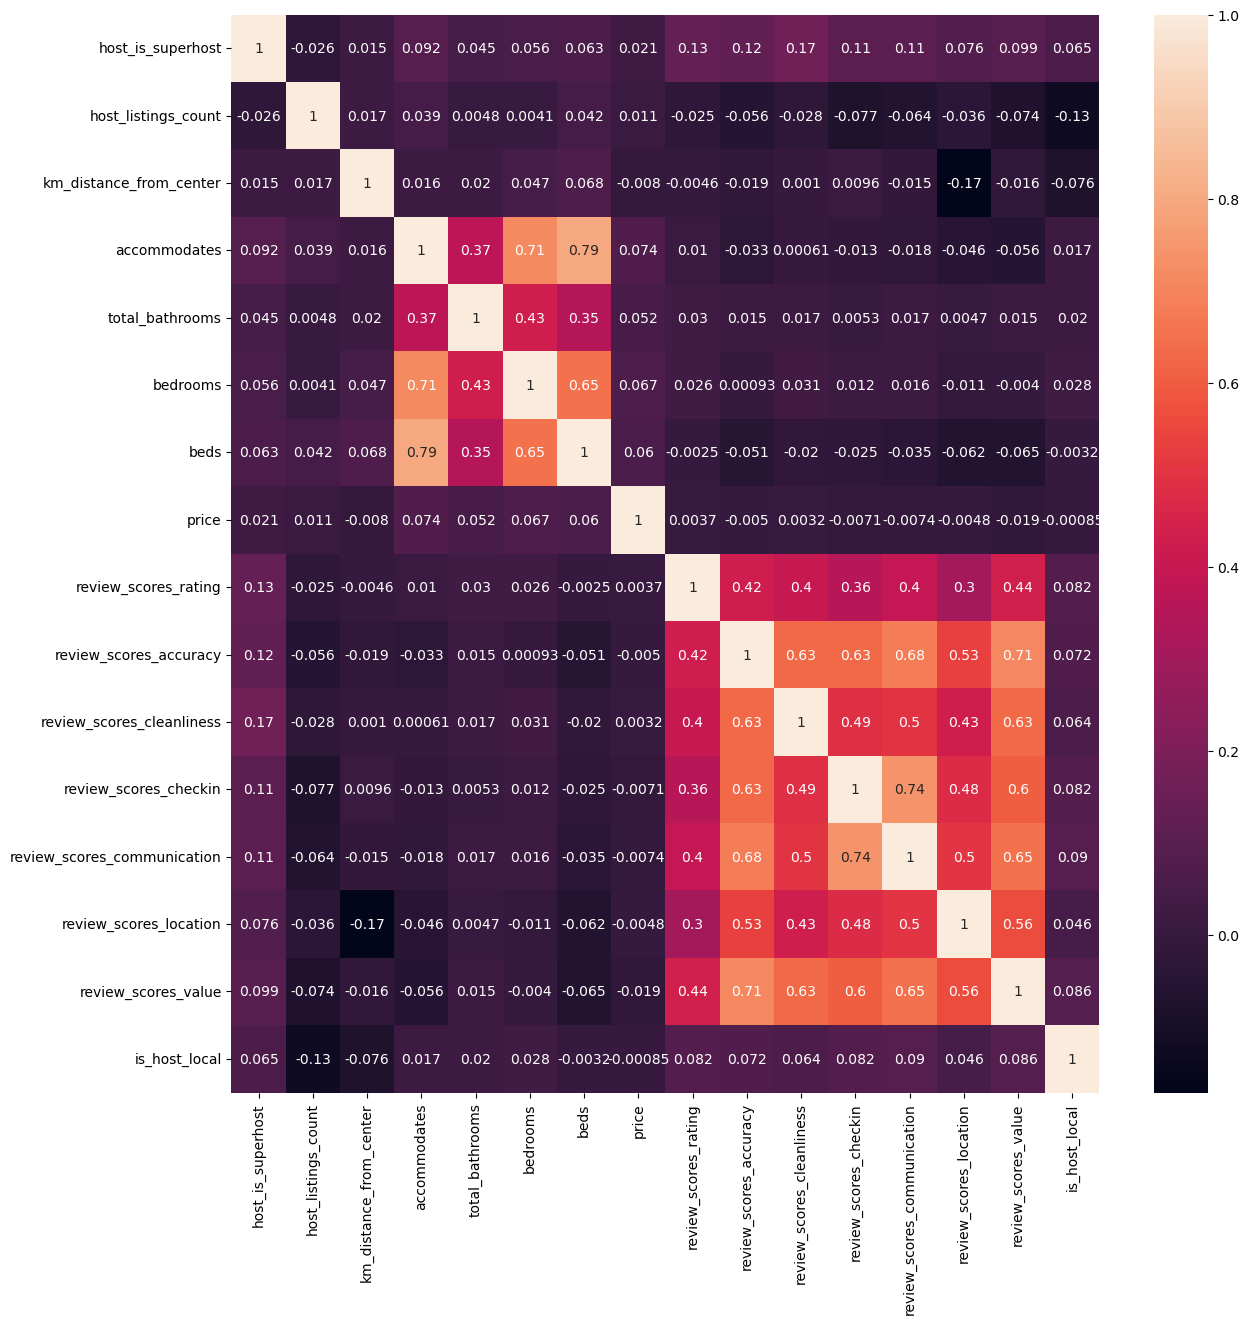

In [96]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(14,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_mpl_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Very interesting, price seems to have a weak connection with all of these variables!

What is very interesting is the review scores in terms of overall rating. Location is the weakest at 0.3 while the strongest are value (0.44) accuracy at 0.42 and then cleanliness at .04.

## Comfort correlation: baths, beds, etc.

In [97]:
df.describe()

,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000,56857.000000
mean,9.421953,52.509628,13.403791,4.915473,2.853703,1.123186,1.283096,1.789665,105.026586,4.658447,4.787913,4.653303,4.817181,4.817032,4.755150,4.645059
std,54.824603,0.034032,0.066907,3.464715,1.776878,0.381033,0.648532,1.388013,637.924567,0.631196,0.344564,0.433821,0.332510,0.343928,0.323478,0.388202
min,1.000000,52.332300,13.072850,0.000329,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,52.489710,13.366050,2.932125,2.000000,1.000000,1.000000,1.000000,45.000000,4.658437,4.787921,4.620000,4.817192,4.817044,4.730000,4.600000
50%,1.000000,52.509720,13.413190,4.148767,2.000000,1.000000,1.000000,1.000000,70.000000,4.750000,4.830000,4.690000,4.870000,4.880000,4.780000,4.670000
75%,3.000000,52.532550,13.438840,5.831872,4.000000,1.000000,1.000000,2.000000,119.000000,4.980000,5.000000,4.940000,5.000000,5.000000,4.990000,4.860000
max,1126.000000,52.673960,13.769390,27.135185,16.000000,8.500000,12.000000,29.000000,98108.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [98]:
105.026586 + (637.924567*2)

1380.87572

In [99]:
#I want to try this removing price outliers, which when calculated (mean + 2*SD) brings me to the above
new_df = df[df['price'] <= 1380.88]

In [100]:
new_df.corr()

/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_89163/4065070317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,host_is_superhost,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local
host_is_superhost,1.000000,-0.026520,0.027852,-0.020653,0.015192,0.091943,0.043943,0.054431,0.062007,0.165534,0.131017,0.122755,0.170623,0.107844,0.110028,0.075859,0.098740,0.316082,0.064820
host_listings_count,-0.026520,1.000000,-0.014107,0.004857,0.016804,0.039590,0.004863,0.004067,0.042234,0.087625,-0.025501,-0.055550,-0.027819,-0.077116,-0.064233,-0.036502,-0.074276,0.089703,-0.129151
latitude,0.027852,-0.014107,1.000000,-0.133498,-0.407705,0.006760,-0.005068,0.009591,-0.005542,0.037853,0.005080,0.011603,0.015539,-0.011850,0.001951,0.010021,0.009902,0.005969,0.008798
longitude,-0.020653,0.004857,-0.133498,1.000000,-0.066665,0.004650,-0.023586,-0.005136,-0.005219,-0.032384,0.007844,0.014515,-0.002375,0.015176,0.017075,-0.001688,0.023511,-0.000100,0.027317
km_distance_from_center,0.015192,0.016804,-0.407705,-0.066665,1.000000,0.016687,0.020526,0.047338,0.068135,-0.073595,-0.004046,-0.018748,0.001468,0.010851,-0.013703,-0.170438,-0.015332,0.010702,-0.076028
accommodates,0.091943,0.039590,0.006760,0.004650,0.016687,1.000000,0.368111,0.714587,0.797230,0.498131,0.009568,-0.033436,0.000048,-0.013291,-0.018239,-0.046692,-0.056585,0.272517,0.016991
total_bathrooms,0.043943,0.004863,-0.005068,-0.023586,0.020526,0.368111,1.000000,0.427579,0.347390,0.301915,0.029284,0.014928,0.016374,0.004513,0.016456,0.003982,0.014281,0.102945,0.019180
bedrooms,0.054431,0.004067,0.009591,-0.005136,0.047338,0.714587,0.427579,1.000000,0.649927,0.433918,0.025850,0.000731,0.031104,0.011524,0.015771,-0.011468,-0.004079,0.162268,0.028401
beds,0.062007,0.042234,-0.005542,-0.005219,0.068135,0.797230,0.347390,0.649927,1.000000,0.399832,-0.002628,-0.051566,-0.020208,-0.025461,-0.034982,-0.062095,-0.065582,0.234009,-0.003512
price,0.165534,0.087625,0.037853,-0.032384,-0.073595,0.498131,0.301915,0.433918,0.399832,1.000000,0.055958,-0.003111,0.080408,-0.011268,-0.010590,0.034953,-0.049418,0.356794,-0.034034


In [101]:
newdf_mpl_columns = ['host_is_superhost', 'host_listings_count',
       'km_distance_from_center', 'accommodates', 'total_bathrooms',
       'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'is_host_local']

In [102]:
newdf_mpl_subset = new_df[newdf_mpl_columns]

In [103]:
correlation_matrix = newdf_mpl_subset.corr()

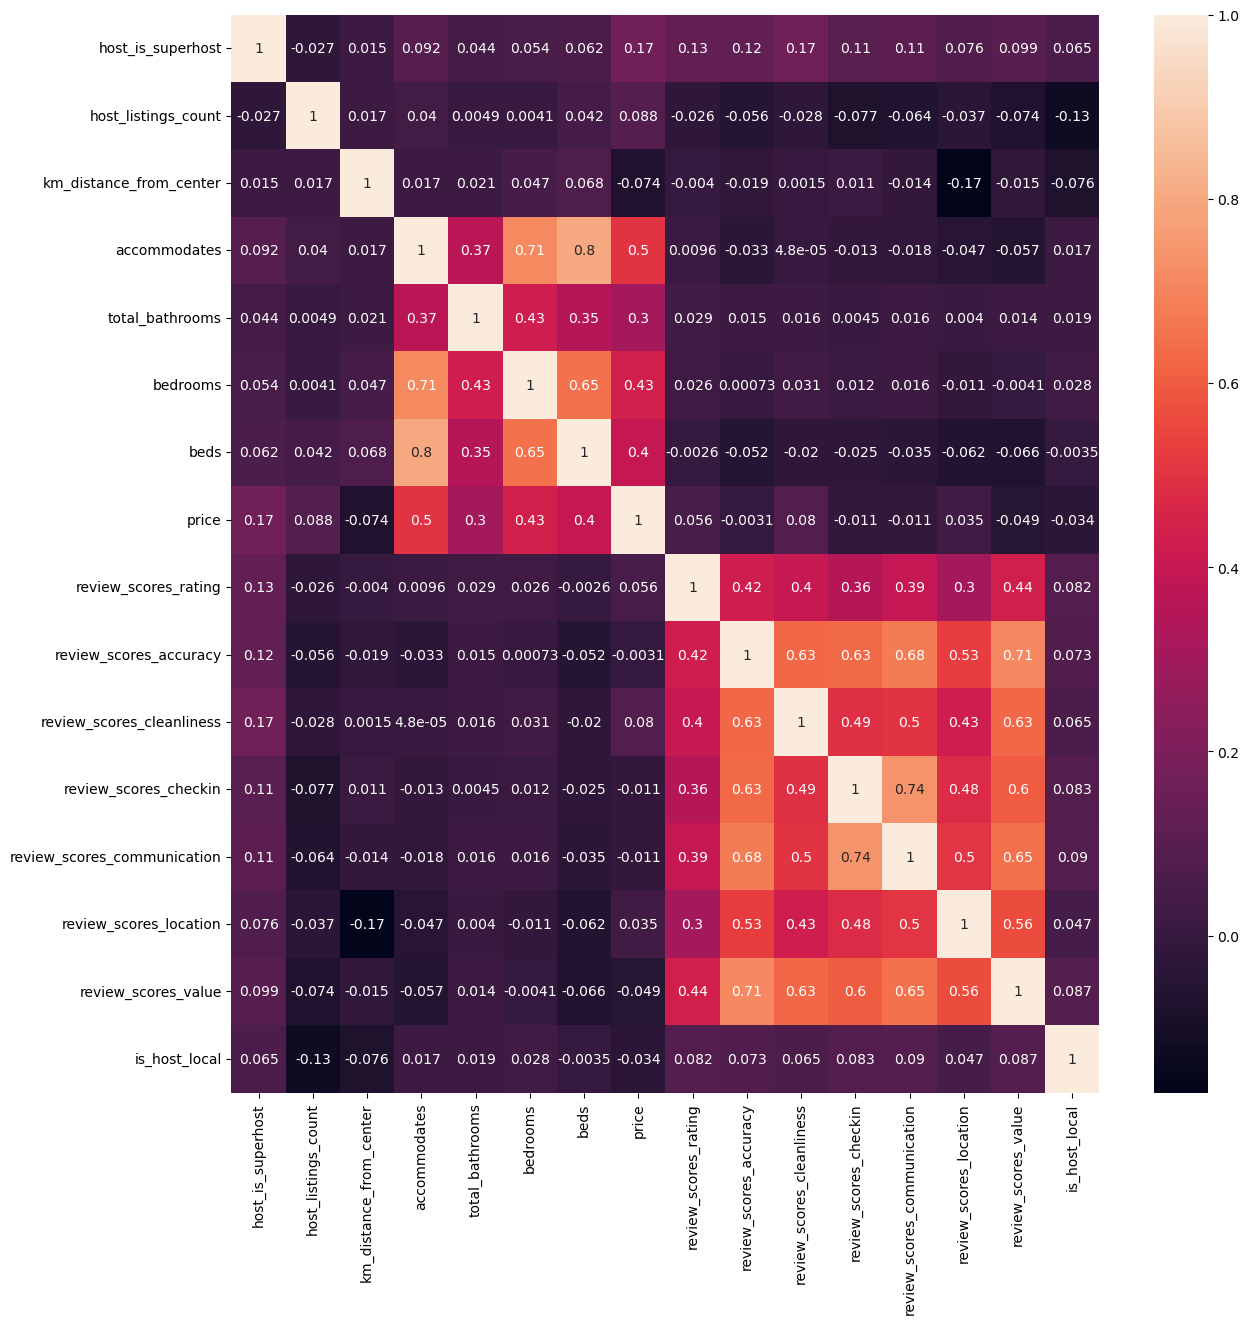

In [104]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(14,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(newdf_mpl_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

No Major change

# Research Question 2: Does host location (within or outside the city of the property) affect price?

In [105]:
df['is_host_local'] = df['is_host_local'].astype(float)

In [106]:
q2columns = ['price', 'is_host_local']

In [107]:
subq2 = df[q2columns]

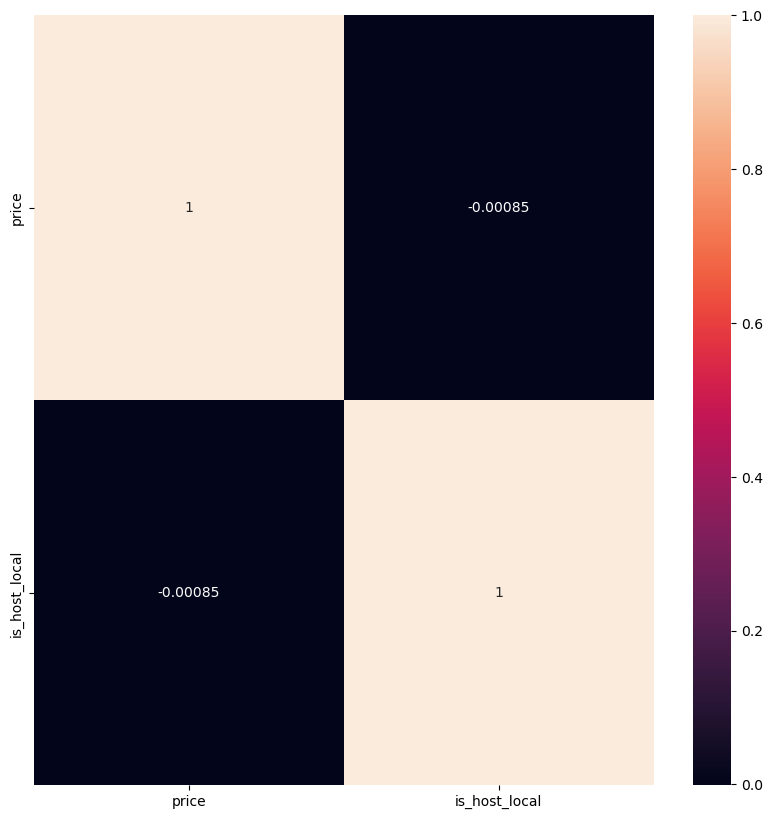

In [108]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subq2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The correlation of host locality and price is extremely weak

# 3. Are superhost status, or listing count correlated to price?

In [109]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'km_distance_from_center', 'property_type', 'room_type',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'city', 'is_host_local'],
      dtype='object')

In [110]:
q3columns = ['price', 'host_is_superhost', 'host_listings_count']

In [111]:
subq3 = df[q3columns]

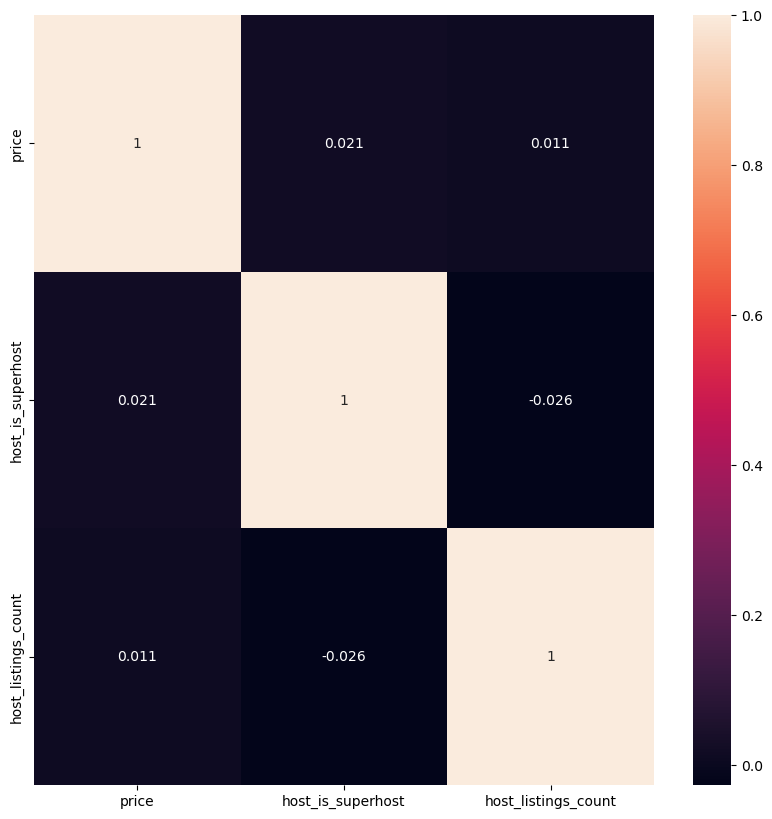

In [112]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subq3.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

superhost status, or listing count are not correlated to price

### Scatterplots:

#### Research question 8

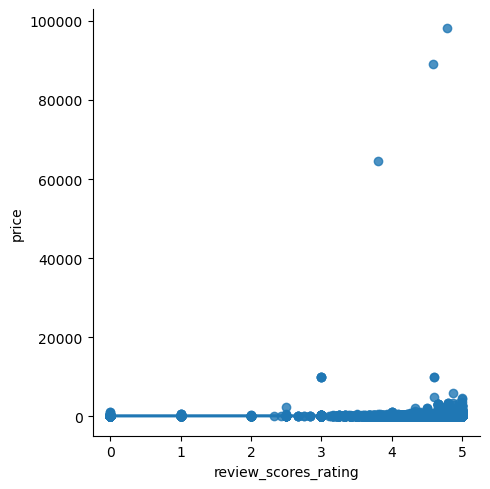

In [113]:
# Create a scatterplot for the overall review score and price columns in seaborn
# This answers research question 8: Do average review ratings affect price?
sns.lmplot(x = 'review_scores_rating', y = 'price', data = df)

The scatterplot rather indicates that higher costing places actually have better reviews, but overall the trend line is flat

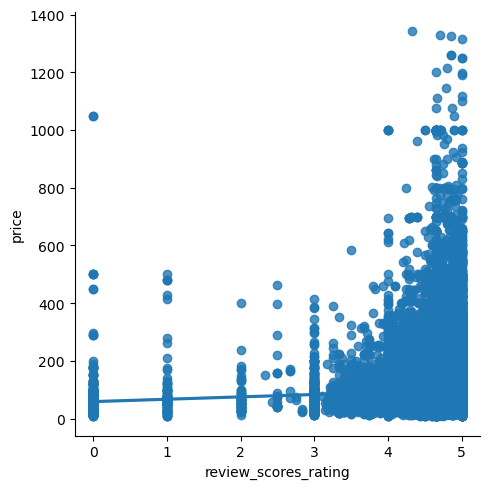

In [114]:
#price outliers removed version
sns.lmplot(x = 'review_scores_rating', y = 'price', data = new_df)

#### Research question 2

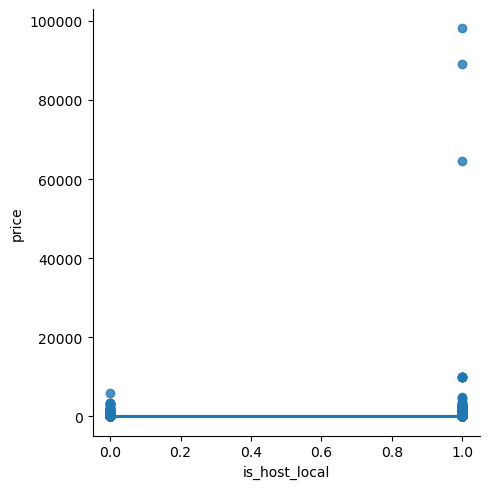

In [115]:
# Does host location (within or outside the city of the property) affect price?
sns.lmplot(x = 'is_host_local', y = 'price', data = df)

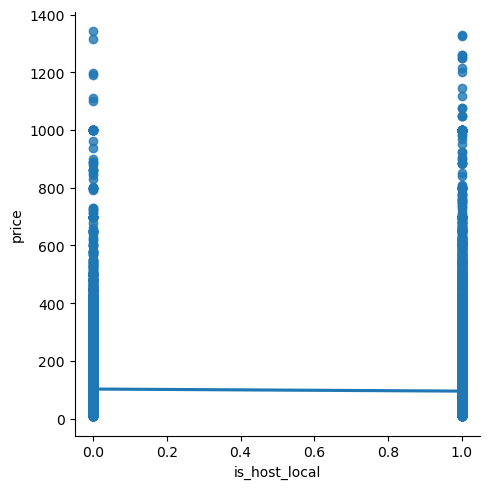

In [116]:
#price outliers removed version
sns.lmplot(x = 'is_host_local', y = 'price', data = new_df)

In [117]:
df['is_host_local'].value_counts(dropna = False)

1.0    42072
0.0    14785
Name: is_host_local, dtype: int64

Local hosts charge the most here.

#### Research question 3

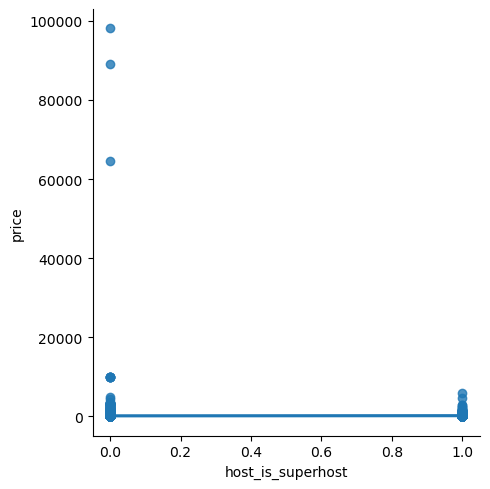

In [118]:
 # Are superhost status or listing count correlated to price?
sns.lmplot(x = 'host_is_superhost', y = 'price', data = df)

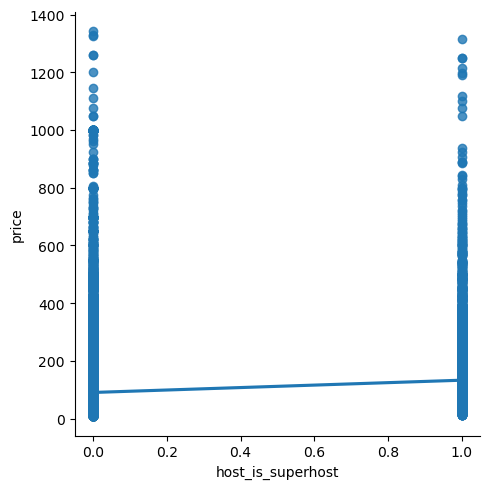

In [119]:
#price outliers excluded
sns.lmplot(x = 'host_is_superhost', y = 'price', data = new_df)

In [120]:
df['host_is_superhost'].value_counts(dropna = False)

False    48078
True      8779
Name: host_is_superhost, dtype: int64

Superhosts status does not seem to affect price at all

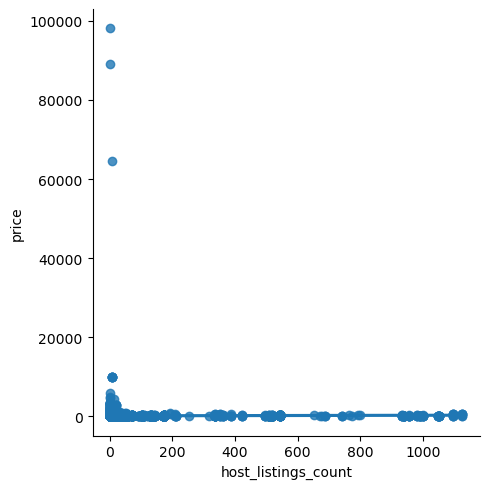

In [121]:
sns.lmplot(x = 'host_listings_count', y = 'price', data = df)

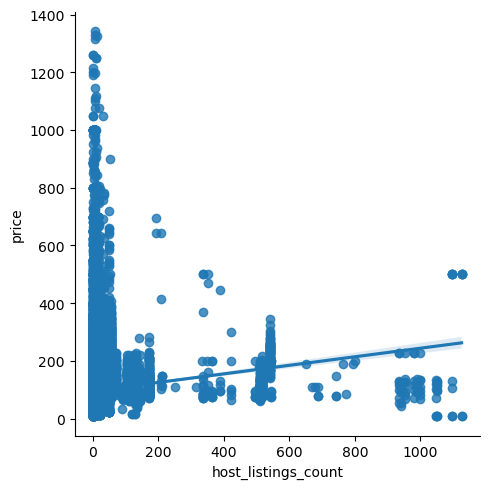

In [122]:
#prices excluded version
sns.lmplot(x = 'host_listings_count', y = 'price', data = new_df)

It is true that higher listing counts mean higher prices

#### Research question 7

In [123]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'km_distance_from_center', 'property_type', 'room_type',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'city', 'is_host_local'],
      dtype='object')

In [124]:
# How do room, property type, bathroom or bed count, or accommodation capacity affect price?
# We can look at room, bed count, and accomodation capacity here

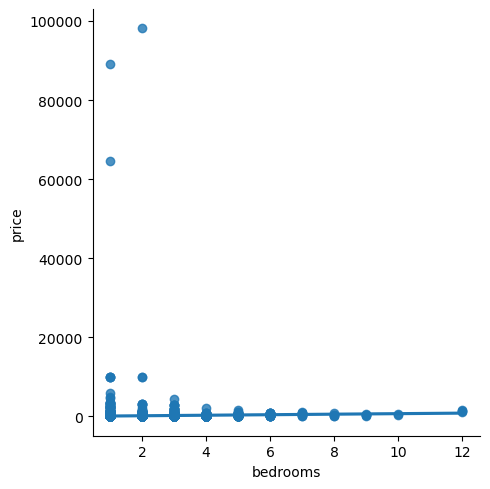

In [125]:
sns.lmplot(x = 'bedrooms', y = 'price', data = df)

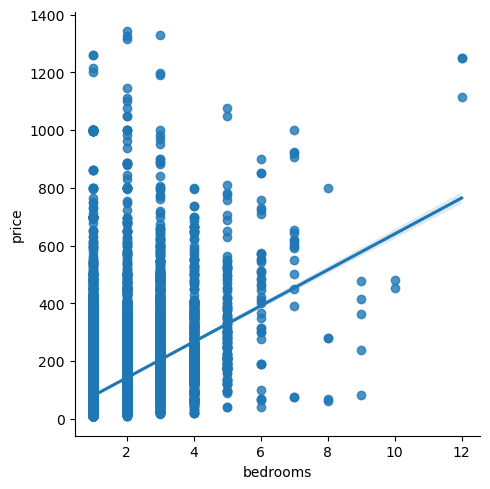

In [126]:
#new prices version
sns.lmplot(x = 'bedrooms', y = 'price', data = new_df)

All in all, higher amounts of bedrooms does lead to higher prices

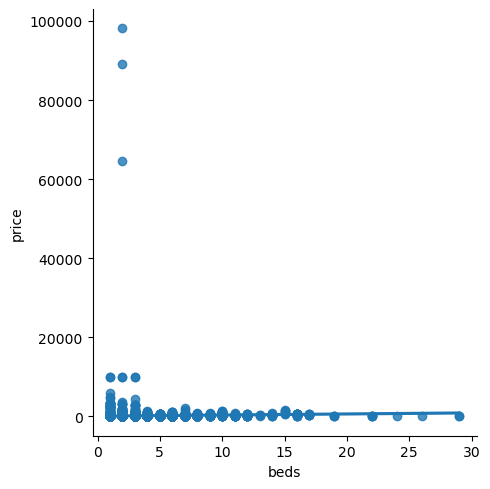

In [127]:
sns.lmplot(x = 'beds', y = 'price', data = df)

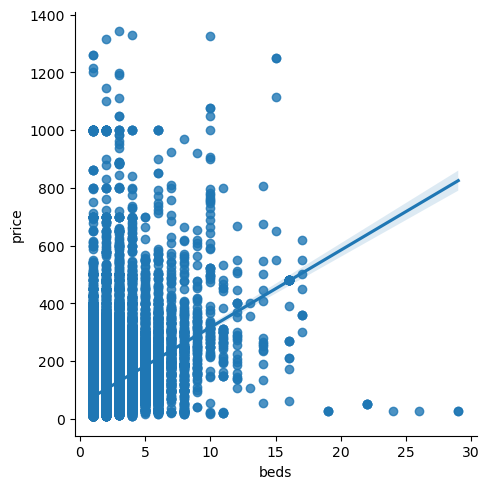

In [128]:
#price outliers excluded version
sns.lmplot(x = 'beds', y = 'price', data = new_df)

Higher amounts of beds definitely lead to higher prices

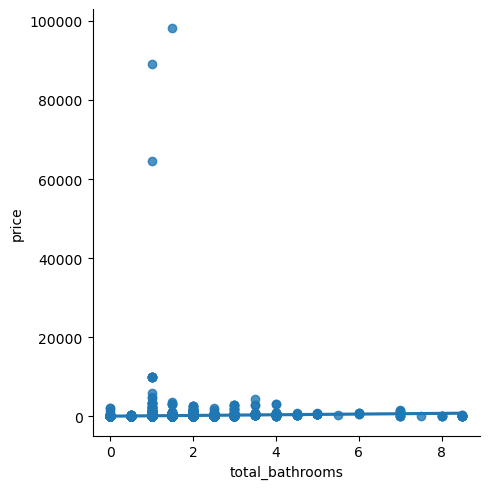

In [129]:
sns.lmplot(x = 'total_bathrooms', y = 'price', data = df)

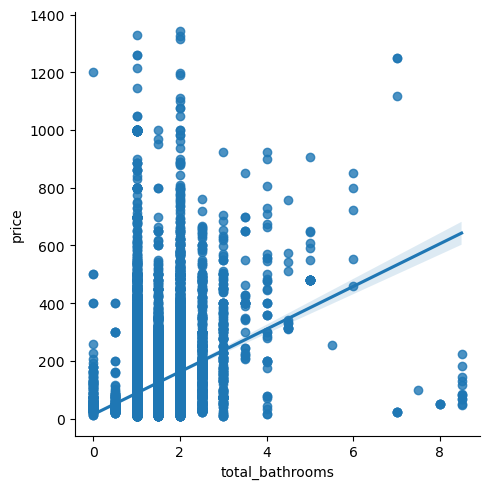

In [130]:
# price outliers excluded
sns.lmplot(x = 'total_bathrooms', y = 'price', data = new_df)

Higher amounts of bathrooms do lead to higher prices

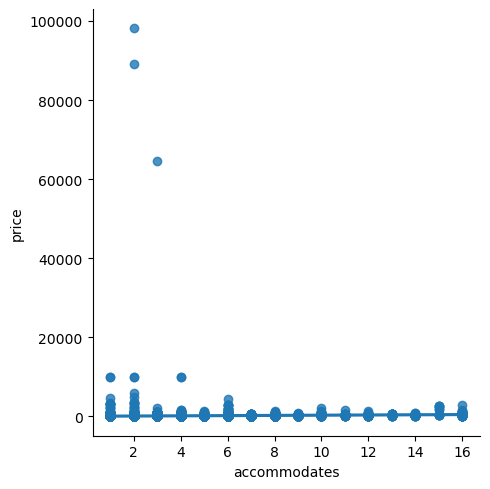

In [131]:
sns.lmplot(x = 'accommodates', y = 'price', data = df)

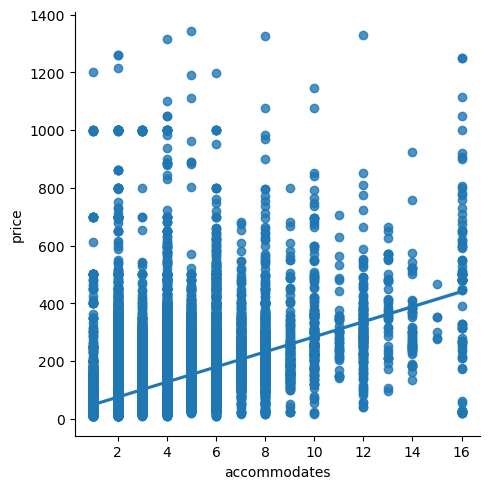

In [132]:
sns.lmplot(x = 'accommodates', y = 'price', data = new_df)

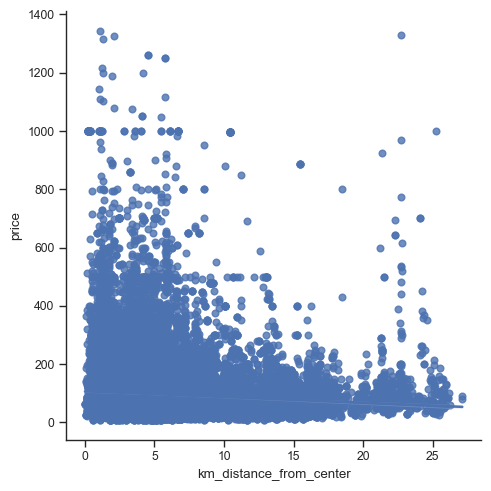

In [159]:
sns.lmplot(x = 'km_distance_from_center', y = 'price', data = new_df)

Higher prices tend to be in places that accomodate 2-8 people, and more accomodation capacity is definitely an indicator of price

### Pair Plots:

In [133]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'km_distance_from_center', 'property_type', 'room_type',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'city', 'is_host_local'],
      dtype='object')

In [134]:
# Keep only the variables you want to use in the pair plot

pair_plot_subset = df[['total_bathrooms', 'km_distance_from_center', 'accommodates', 'price', 'review_scores_rating','host_listings_count']]

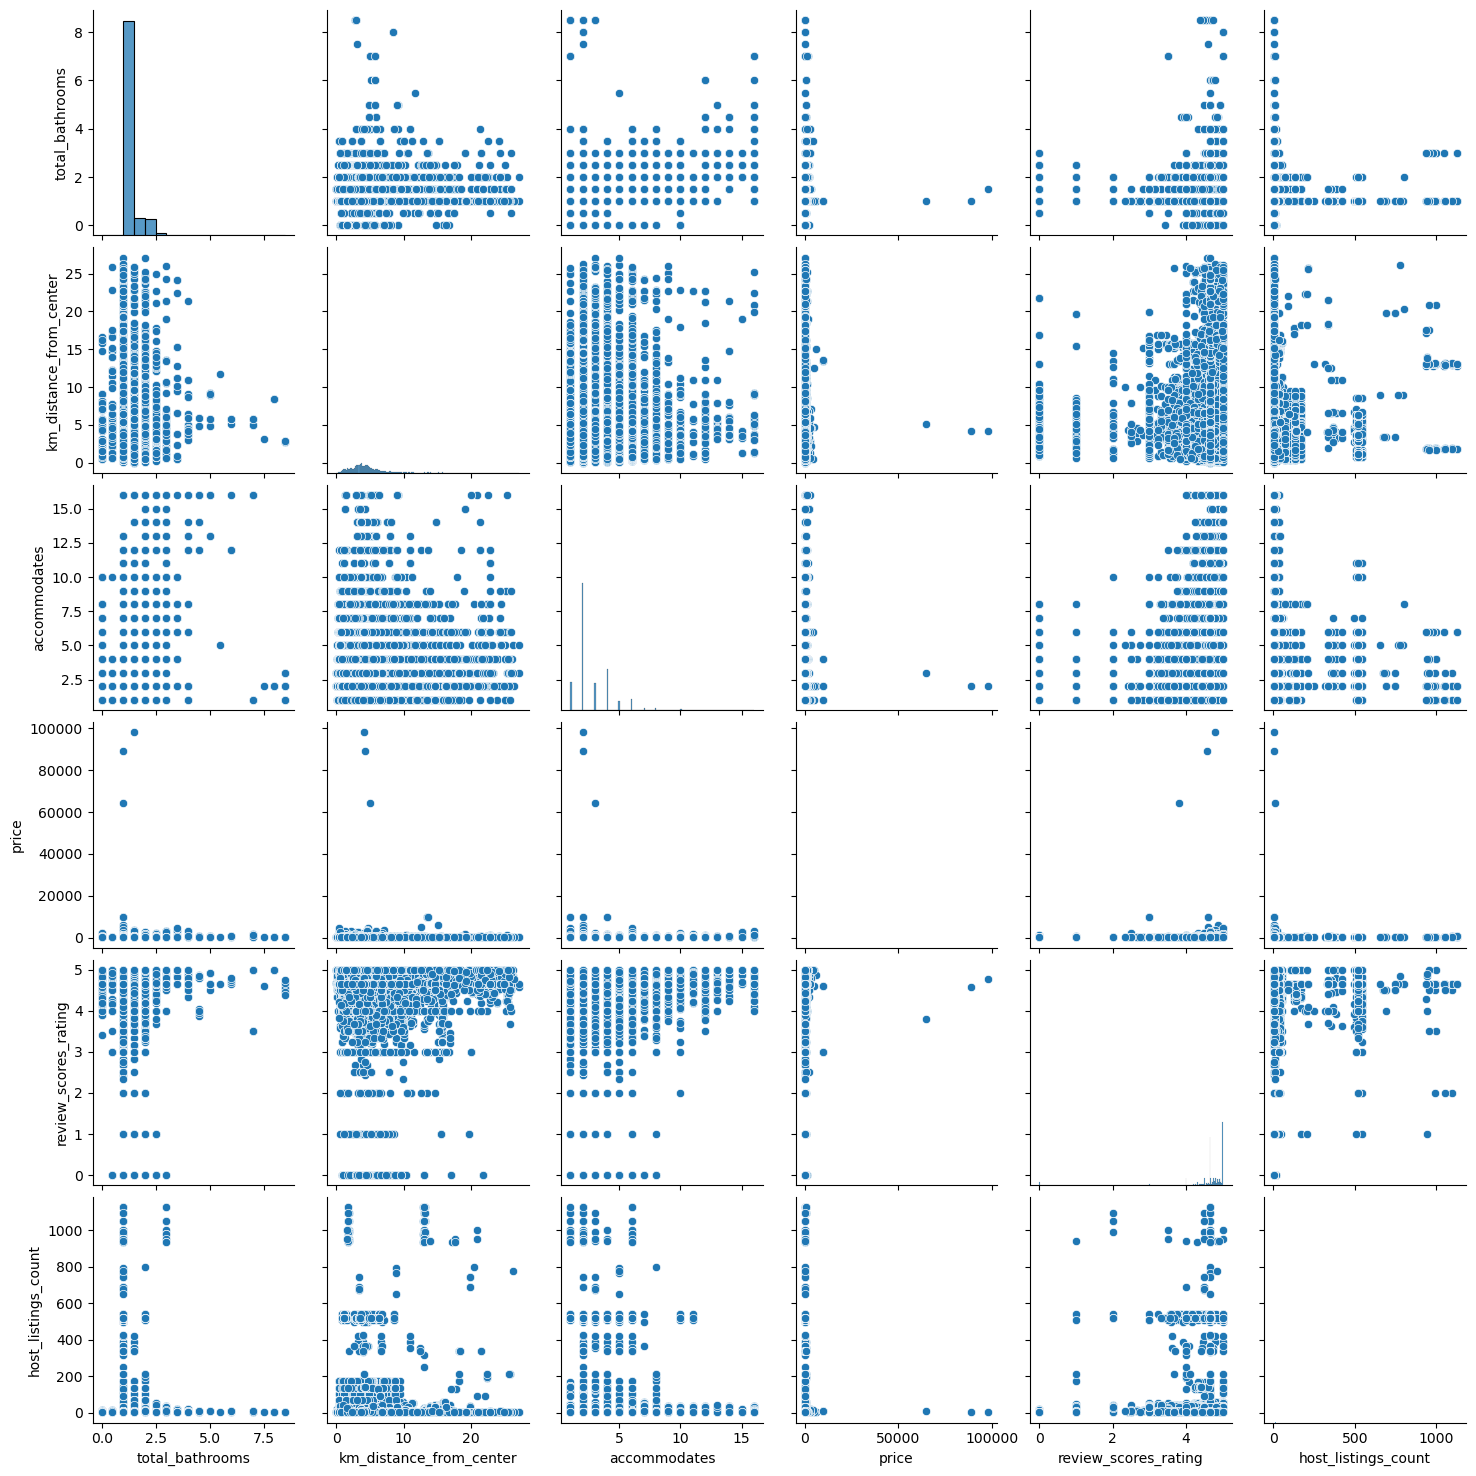

In [135]:
# Create a pair plot 

g = sns.pairplot(pair_plot_subset)

In [136]:
# price outliers removed
pair_plot_subset = new_df[['total_bathrooms', 'km_distance_from_center', 'accommodates', 'price', 'review_scores_rating','host_listings_count']]

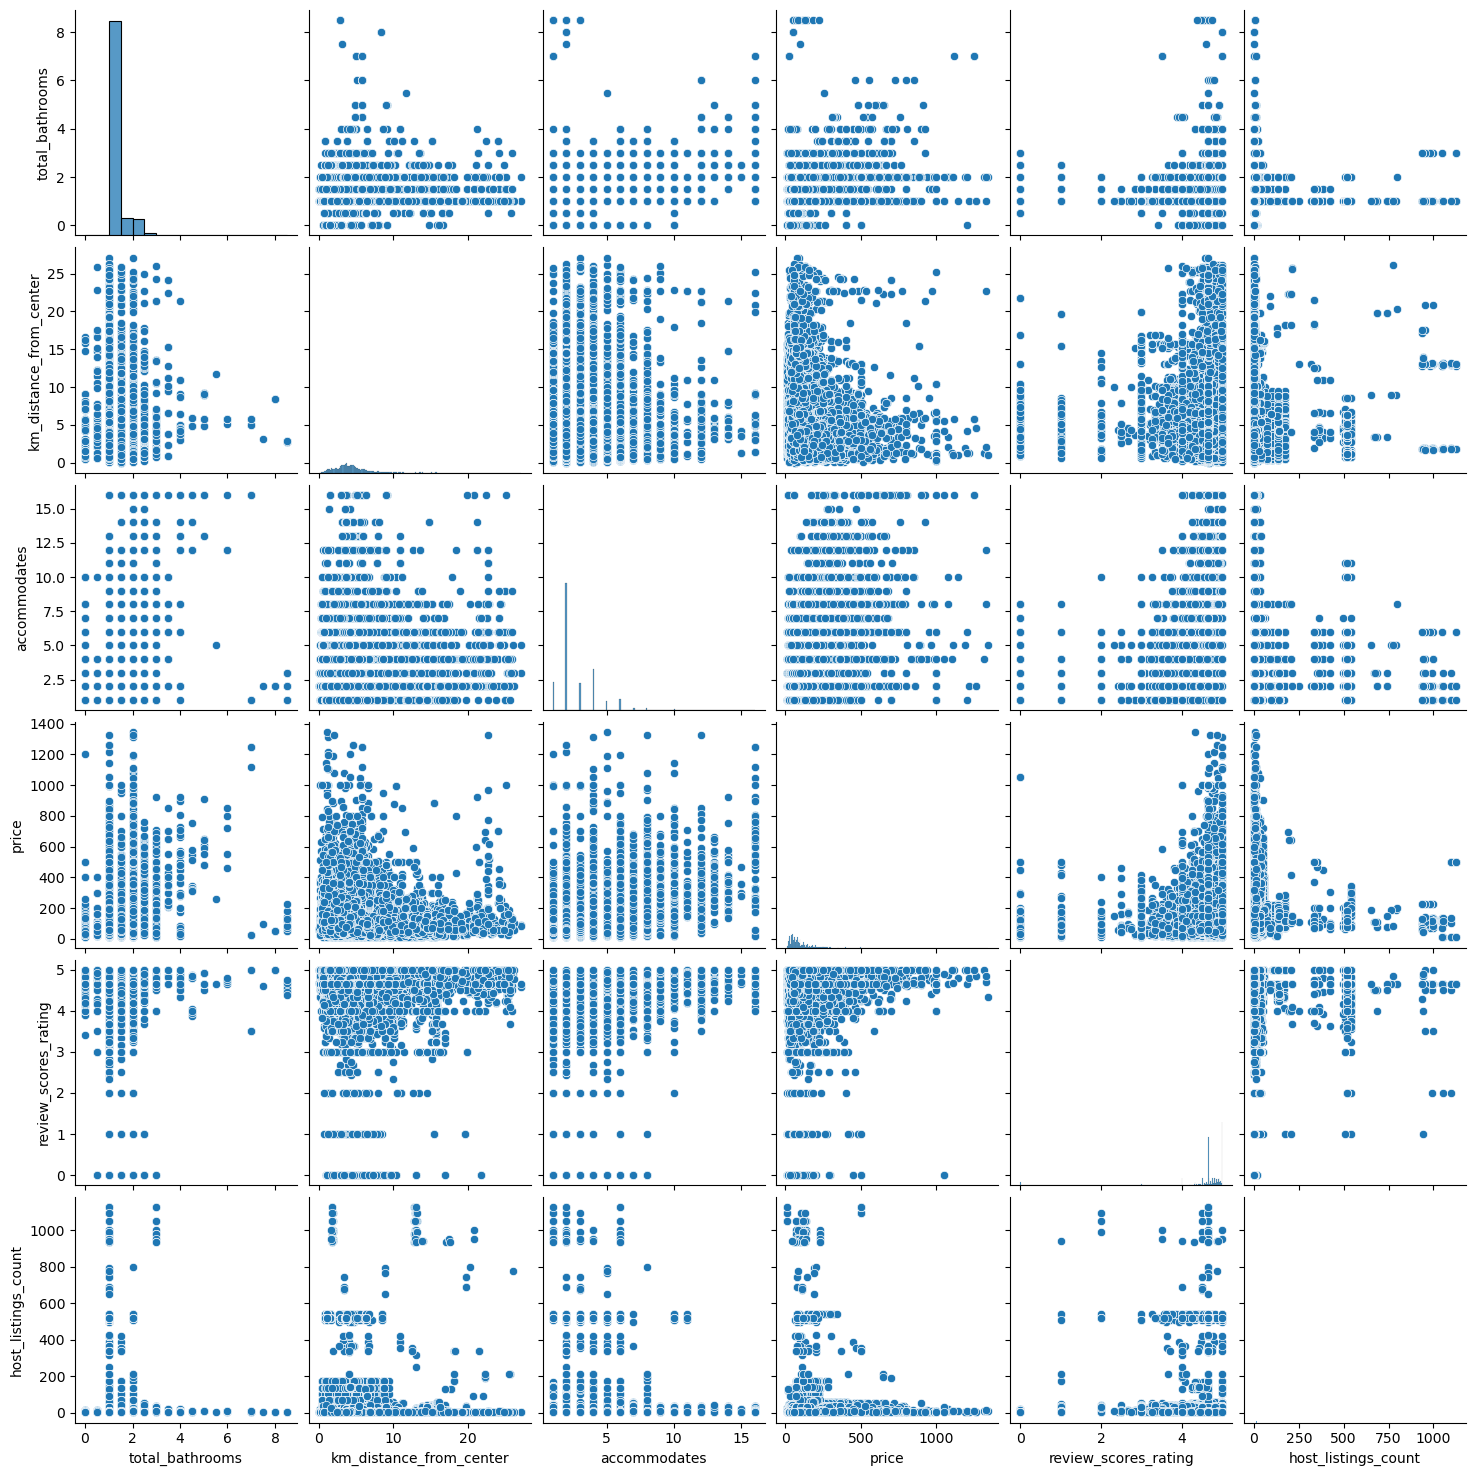

In [137]:
g = sns.pairplot(pair_plot_subset)

#### Distance

Distance from center does not seem to correlate greatly with how many people a property can accommodate, in fact, the high end on accommodation capacity is actually closer to the center.

The most expensive properties tend to be close to the center, rather unsurprising.

Notably there are far fewer lower review scores further from the center: it could be that those are better taken care of, but it could be simply that Airbnb’s close to the center are more strongly represented

Most listings are located close to the center 

#### Accomodation capacity (accommodates)

Accomodation capacity varies wildly

Review scores are mostly high regardless, but are lower at lower levels.

The relationship of price and accommodation capacity is indeed not highly correlated, many of the outliers appear in the second quartile of accommodation capacity.

#### Price

Higher host listing counts in fact seem to correlate with higher price strongly negatively. The most expensive properties are owned or managed by those with few

Most of the negative reviews come via cheaper properties. It could be a matter of not valuing what’s there, or that less care is put into these properties



#### Ratings

No new insights about ratings

#### Listings count


People with more listings tend to be able to accommodate fewer people

People with more listings charge lower prices



### Categorical Plots:

In [138]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'km_distance_from_center', 'property_type', 'room_type',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'city', 'is_host_local'],
      dtype='object')

<Axes: xlabel='km_distance_from_center', ylabel='Count'>

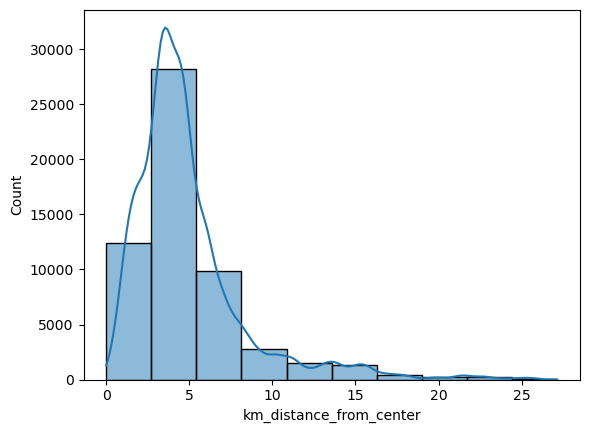

In [139]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['km_distance_from_center'], bins = 10, kde = True)

<Axes: xlabel='km_distance_from_center', ylabel='Count'>

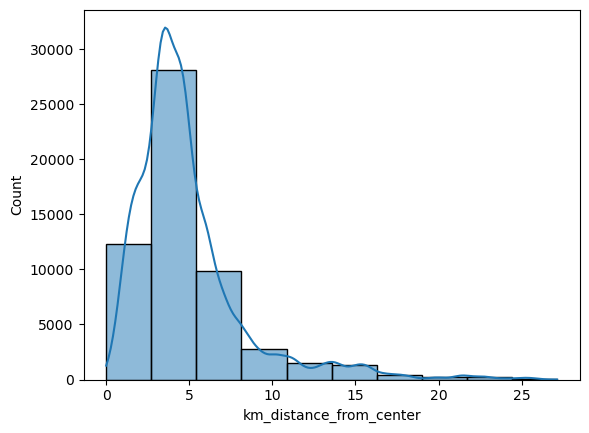

In [140]:
#price outliers excluded
sns.histplot(new_df['km_distance_from_center'], bins = 10, kde = True)

Vast majority are quite close to center, right skew.

Hosts mostly list properties here.

<Axes: xlabel='host_listings_count', ylabel='Count'>

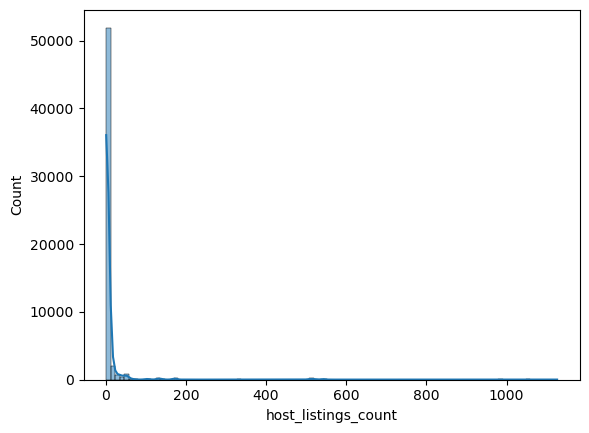

In [141]:
sns.histplot(df['host_listings_count'], bins = 100, kde = True)

<Axes: xlabel='host_listings_count', ylabel='Count'>

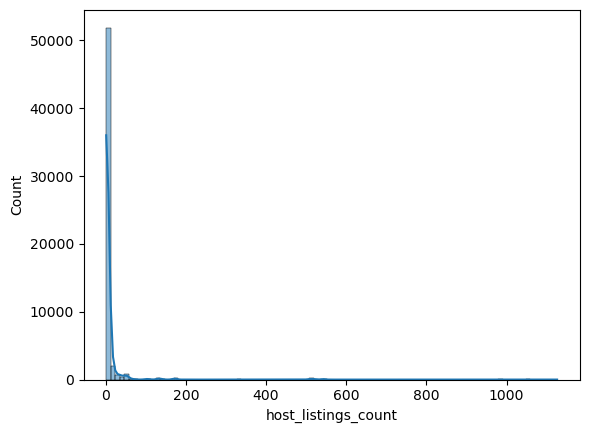

In [142]:
sns.histplot(new_df['host_listings_count'], bins = 100, kde = True)

Vast majority have few listings

# Look at raw data to add figures

<Axes: xlabel='review_scores_rating', ylabel='Count'>

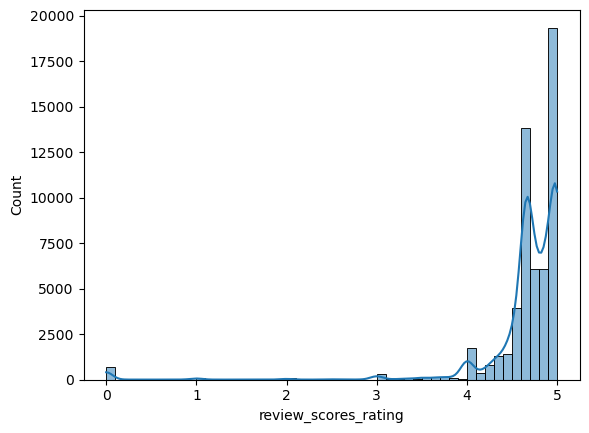

In [143]:
sns.histplot(df['review_scores_rating'], bins = 50, kde = True)

<Axes: xlabel='review_scores_rating', ylabel='Count'>

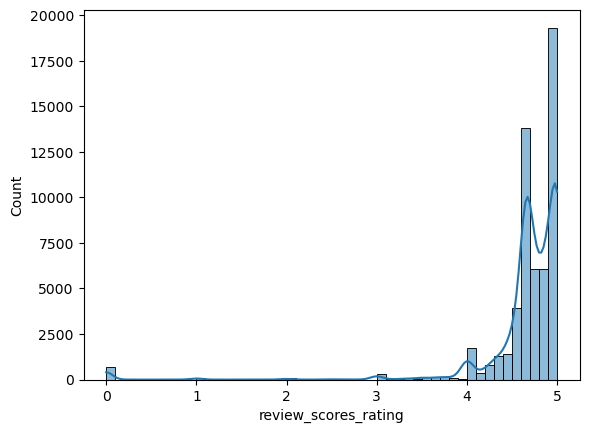

In [144]:
#price outliers removed
sns.histplot(new_df['review_scores_rating'], bins = 50, kde = True)

Very strong left skew. 

<Axes: xlabel='accommodates', ylabel='Count'>

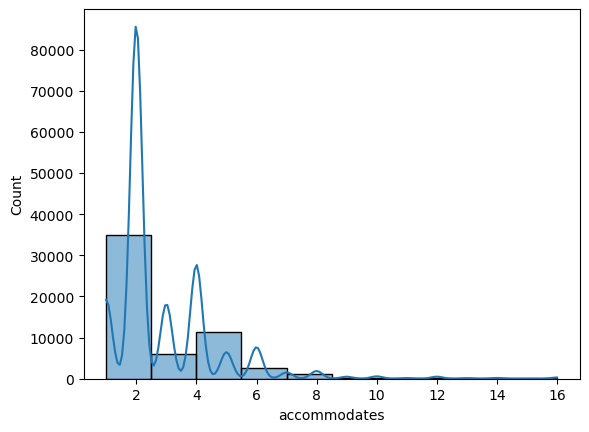

In [145]:
sns.histplot(df['accommodates'], bins = 10, kde = True)

<Axes: xlabel='accommodates', ylabel='Count'>

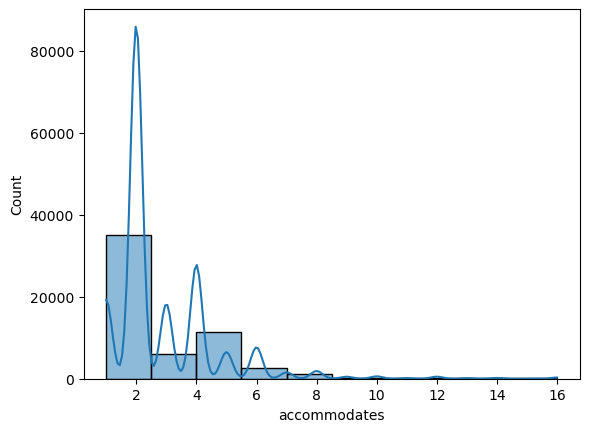

In [146]:
#price outliers excluded version
sns.histplot(new_df['accommodates'], bins = 10, kde = True)

<Axes: xlabel='price', ylabel='Count'>

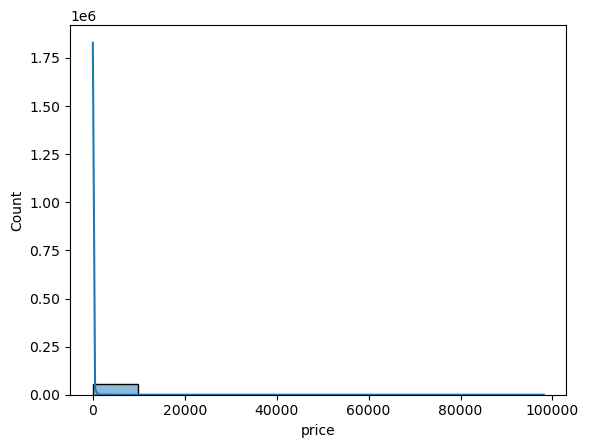

In [147]:
sns.histplot(df['price'], bins = 10, kde = True)

<Axes: xlabel='price', ylabel='Count'>

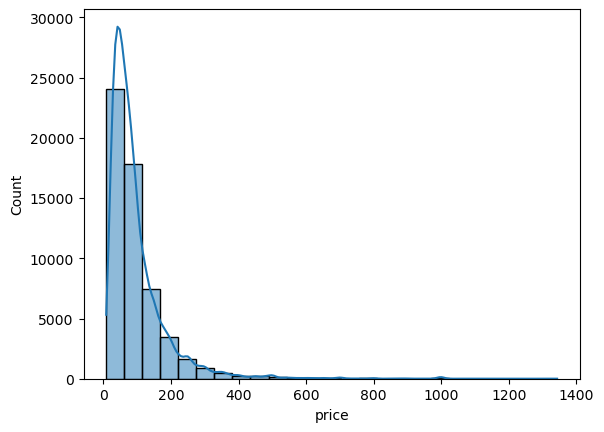

In [148]:
#price outliers exlcuded
sns.histplot(new_df['price'], bins = 25, kde = True)

Huge right skew here
Once excluding for outliers it's clear 91% of properties are less than 200 per night

In [149]:
percentage_below_200 = (new_df['price'] <= 200).mean() * 100
print(f"{percentage_below_200:.2f}%")

91.56%


In [150]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'km_distance_from_center', 'property_type', 'room_type',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'city', 'is_host_local'],
      dtype='object')

/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_89163/1455041878.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.catplot(x="room_type", y="price", palette ='crest', data=df)


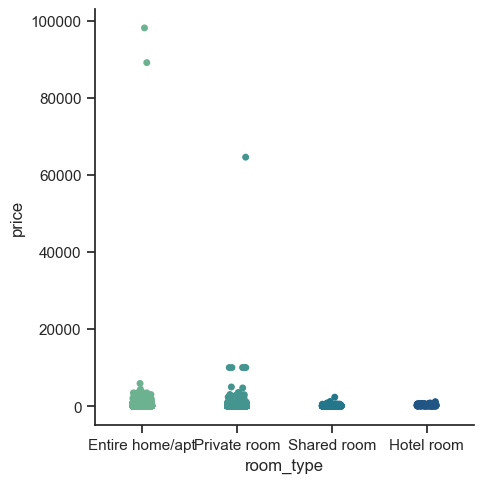

In [151]:
# Create a categorical plot in seaborn looking at the price differences among different kinds of property

sns.set(style="ticks")
g = sns.catplot(x="room_type", y="price", palette ='crest', data=df)

/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_89163/205699310.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.catplot(x="room_type", y="price", palette ='crest', data=new_df)


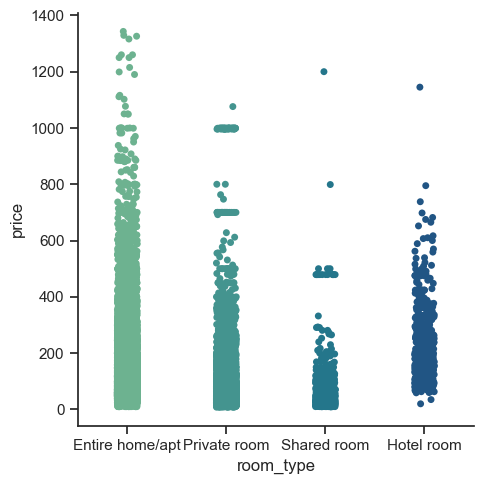

In [152]:
# Create a categorical plot in seaborn looking at the price differences among different kinds of property

#outliers removed

sns.set(style="ticks")
g = sns.catplot(x="room_type", y="price", palette ='crest', data=new_df)

In [162]:
new_df['room_type'].value_counts(dropna = False)

Entire home/apt    35260
Private room       20314
Shared room          688
Hotel room           531
Name: room_type, dtype: int64

In [163]:
#let's see how many of the entire homes cost more than 600
count_greater_than_600_entire_home = new_df[(new_df['price'] > 600) & (new_df['room_type'] == 'Entire home/apt')].shape[0]

print(f"Number of rows with price > 600 and room_type 'Entire home/apt': {count_greater_than_600_entire_home}")

Number of rows with price > 600 and room_type 'Entire home/apt': 169


In [164]:
average_price_entire_home = new_df[new_df['room_type'] == 'Entire home/apt']['price'].mean()

print(f"Average price of 'Entire home/apt': {average_price_entire_home}")

Average price of 'Entire home/apt': 117.5653553601815


In [165]:
average_price_by_room_type = new_df.groupby('room_type')['price'].mean()

print("Average price by room type:")
print(average_price_by_room_type)

Average price by room type:
room_type
Entire home/apt    117.565355
Hotel room         226.695857
Private room        59.389025
Shared room         68.880814
Name: price, dtype: float64


/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_89163/1999151257.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.catplot(x="property_type", y="price", palette='crest', data=new_df, height=9, aspect=3)


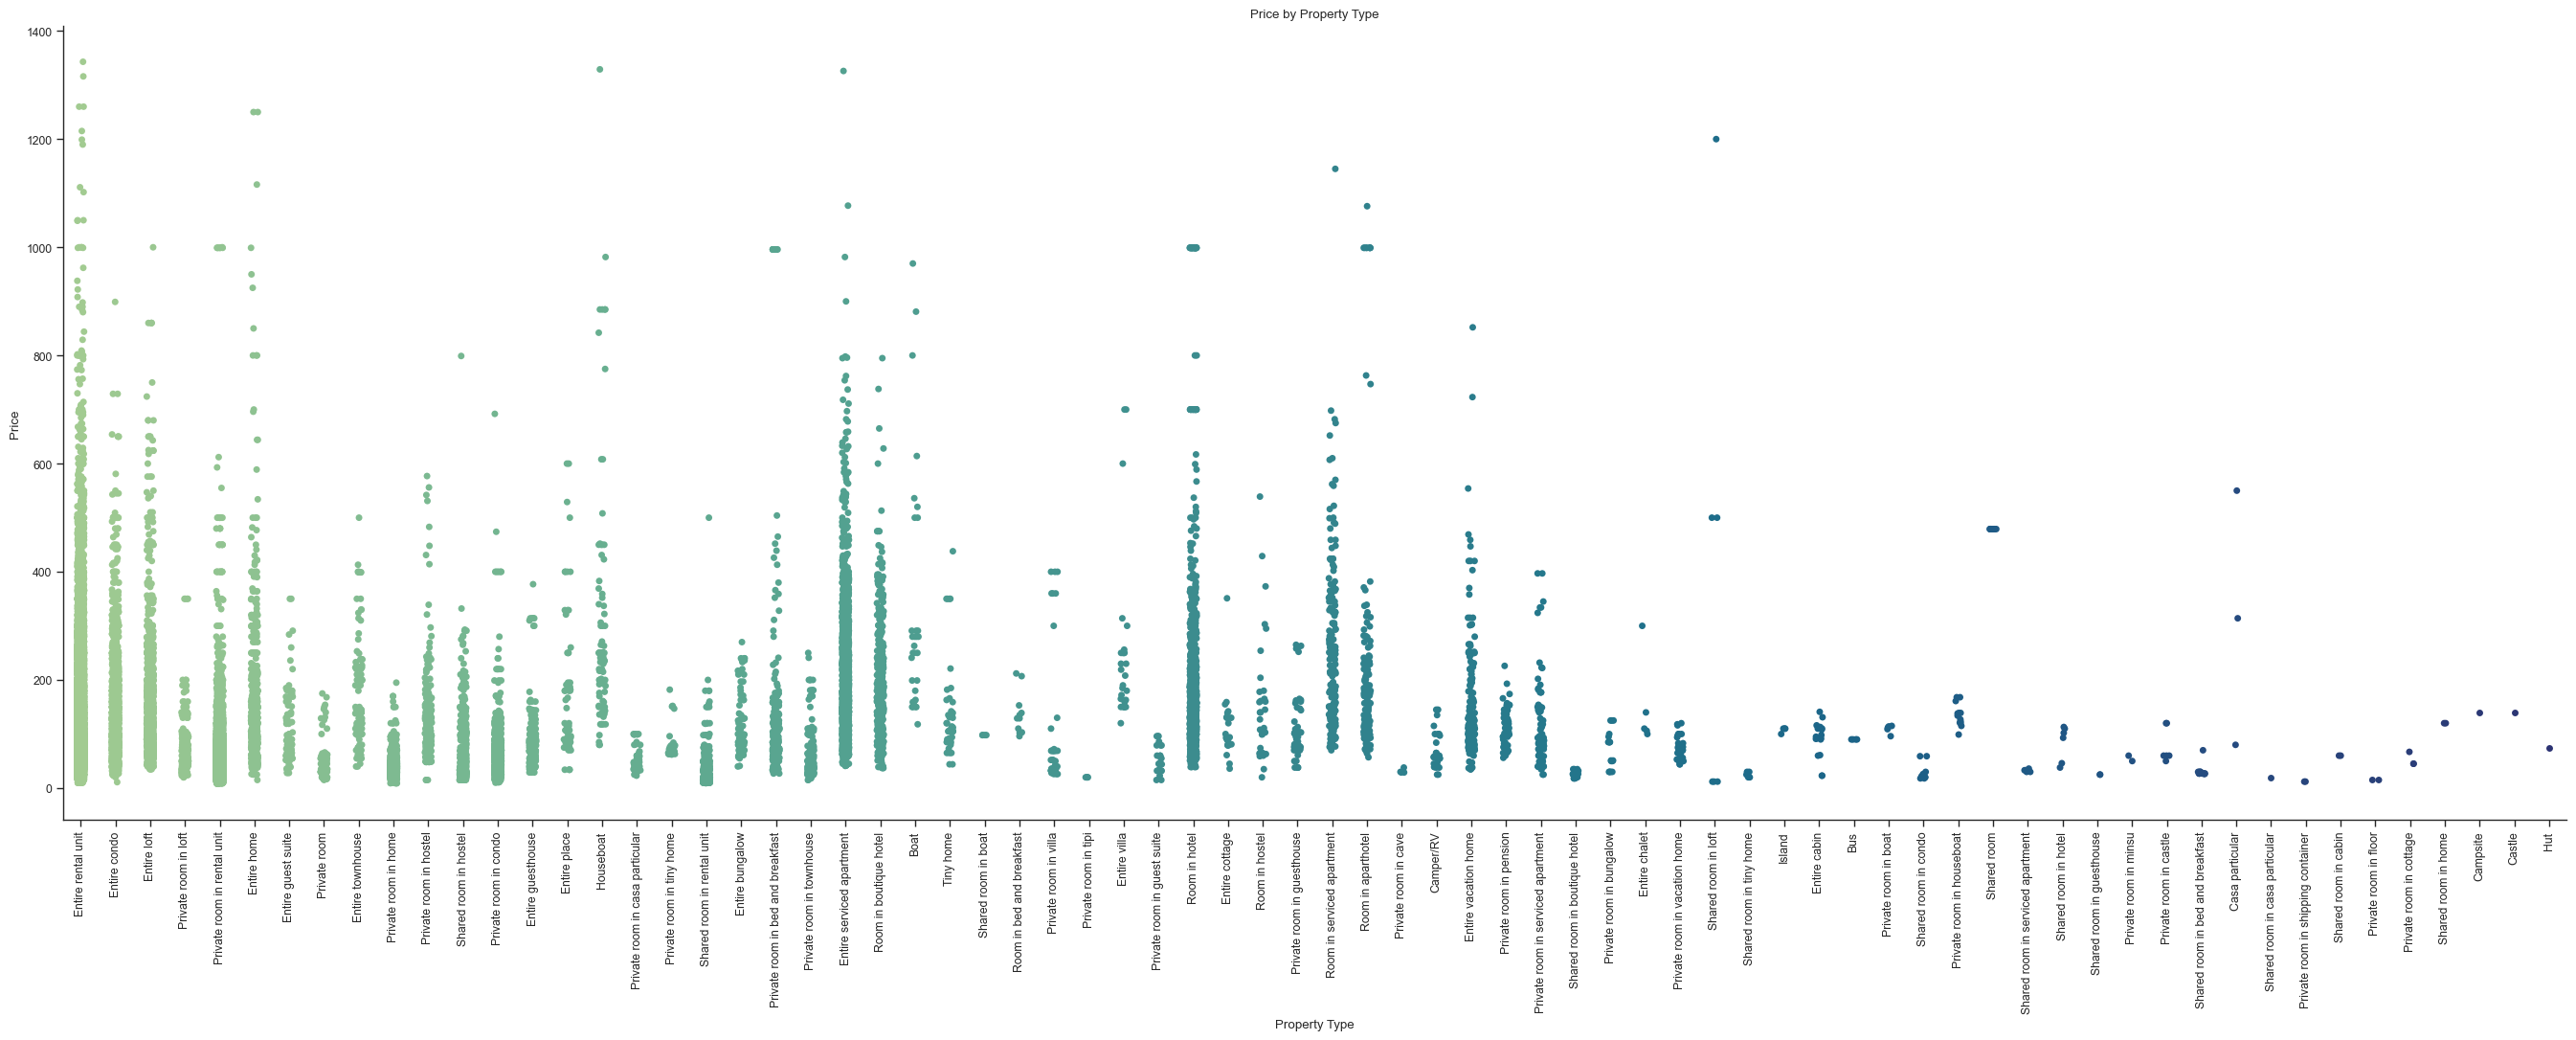

In [153]:
sns.set(style="ticks")
sns.set_context("paper")  # You can adjust the context as needed


g = sns.catplot(x="property_type", y="price", palette='crest', data=new_df, height=9, aspect=3)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees


g.set_axis_labels("Property Type", "Price")
g.set(title="Price by Property Type")

# Show the plot
plt.show()

The homes and private rooms are MUCH more expensive than shared rooms and hotel rooms!

When excluding price outliers though there is a lot more evenness, suggesting that the outliers make a huge difference and that the price difference is much less significant

In [154]:
#answers research question 5: Which neighborhoods have the most expensive listings?

# Hypthoseses

1. Non-local hosts charge more than local ones overall, perhaps as they have more distance and it's more of a business for them
2. Superhost status has little correlation with price or other factors
3. Higher prices are charged by those with more listings, indicating a professionalization among those who have multiple properties.
4. More expensive properties tend to be closer to the center
5. higher amounts of bedrooms, beds, and bathrooms lead to higher prices. 
6. Places that accommodate lots of people are more inexpensive, though not when controlling for price outliers when the opposite is true. This indicates that there some large but relatively inexpensive properties
7. Private spaces are more expensive than shared ones.
8. Prices have increased over the past year, and have grown higher than local salaries proportionally.

In [155]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

In [156]:
#export dataset
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'airbnb_cleaned_with_outliers.pkl'))

In [157]:
#export dataset
new_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'airbnb_cleaned_no_outliers.pkl'))

In [158]:
new_df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'airbnb_cleaned_no_outliers.csv'))